In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm_notebook as tqdm
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from catboost import CatBoostClassifier, Pool
import xgboost as xgb
from sklearn.svm import SVC

%matplotlib inline
sns.set()

In [2]:
df = pd.read_excel(r'D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Отделка_2\Результаты\Классификация_all.xlsx', sheet_name = 0)
df

,model_best_resnet152v2_1,model_best_resnet152v2_2,model_best_resnet152v2_3,ResNet152V2_model,model_best_resnet152v2_aug_2,ResNet152V2_8_my_aug_pre_true,ResNet152V2_8_my_aug_pre_true_2,catmodel_rn152v2_md5_gap,xgboost_rn152v2_md5_gap_1,sgd_rn152v2_gap,...,Итог_4,model_best_resnet152v2_1_pp,model_best_resnet152v2_2_pp,model_best_resnet152v2_3_pp,ResNet152V2_model_pp,model_best_resnet152v2_aug_2_pp,Class_name,True_1,True_2,Foto_name
0,6,0,6,0,3,3,3,0,0,6,...,0,[[1.0640700e-01 2.4768978e-04 1.1628273e-04 7....,[[7.0897651e-01 5.1058142e-04 2.8664999e-05 4....,[[3.9842650e-01 2.8497979e-04 2.7840944e-05 2....,[[9.88448322e-01 2.81522034e-06 6.73688419e-07...,[[3.8395640e-02 7.2494795e-04 9.4738811e-05 7....,мусор,0,0,1001_trash.jpg
1,0,0,0,0,3,0,6,0,0,0,...,0,[[0.35454154 0.01106218 0.00694038 0.18336643 ...,[[6.2144625e-01 2.2966797e-03 2.4401580e-03 8....,[[6.4800131e-01 2.4086123e-03 3.3719460e-03 1....,[[9.9786723e-01 7.0641778e-05 1.8988154e-05 1....,[[2.6032093e-01 1.7940926e-03 9.6477270e-03 3....,мусор,0,0,1006_trash.jpg
2,3,3,0,3,0,3,0,0,0,3,...,3,[[2.2495590e-01 6.2853086e-04 4.0383241e-04 7....,[[2.4371137e-01 2.2119505e-03 2.8408077e-03 7....,[[4.8897770e-01 2.2270887e-03 4.2007277e-03 4....,[[4.5711352e-03 1.2145709e-09 5.2065761e-06 9....,[[4.7965151e-01 3.9372526e-04 3.0012873e-03 4....,мусор,0,3,1013_trash.jpg
3,3,3,0,0,3,3,3,0,0,0,...,3,[[4.1216767e-01 2.6031400e-03 4.8673470e-03 5....,[[2.81813890e-01 1.25009427e-03 7.43367989e-03...,[[0.5781946 0.00278287 0.0123415 0.35399446 ...,[[9.0654224e-01 2.6659141e-04 6.1588626e-02 2....,[[0.10116434 0.00123099 0.00694058 0.84090513 ...,мусор,0,0,1020_trash.jpg
4,0,0,0,0,0,0,0,0,0,0,...,0,[[9.9860531e-01 6.6276539e-06 2.0742592e-04 3....,[[9.9438560e-01 1.6735505e-05 1.2953434e-04 3....,[[9.9968624e-01 1.2718344e-06 2.3136128e-05 2....,[[9.9699914e-01 1.2854736e-09 4.2235060e-06 2....,[[9.9834633e-01 1.8960428e-06 6.8369109e-06 7....,мусор,0,0,1022_trash.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28525,7,7,7,7,7,7,7,7,7,7,...,7,[[2.4509808e-02 6.4355540e-05 1.2664899e-04 6....,[[1.4214347e-01 1.0254207e-03 6.8631099e-04 2....,[[1.9530840e-01 9.7974960e-04 3.6866698e-04 5....,[[1.21860785e-06 8.27733349e-09 3.02097669e-06...,[[6.0841538e-02 3.9438839e-04 6.9849897e-04 3....,моп,7,7,9990_mop.jpg
28526,7,7,7,7,7,7,7,7,3,7,...,7,[[2.7581461e-02 1.4707514e-03 1.9941622e-02 1....,[[1.7838992e-02 2.1532809e-03 8.4779963e-02 4....,[[3.0122114e-02 7.8002908e-03 1.8980521e-01 1....,[[3.9068742e-05 2.5706825e-06 4.0290368e-04 3....,[[2.0644928e-03 1.9803757e-03 1.8776041e-02 9....,моп,7,7,9994_mop.jpg
28527,7,7,7,7,7,7,7,7,7,2,...,7,[[2.4748317e-03 8.4669457e-04 7.6989601e-03 1....,[[6.3161496e-03 4.4139585e-04 6.0489425e-03 6....,[[1.2378830e-02 1.2138794e-03 1.8926827e-02 1....,[[4.7187783e-05 1.3383846e-04 1.9310677e-02 6....,[[3.8878884e-02 1.5142143e-03 7.0235245e-03 6....,моп,7,7,9998_mop.jpg
28528,7,7,7,7,7,7,7,7,7,7,...,7,[[2.0916848e-03 5.1207055e-04 3.1999632e-04 5....,[[5.0903461e-03 2.8668609e-03 8.3585121e-03 2....,[[3.3282288e-03 3.3712976e-03 1.2306295e-02 1....,[[1.4520359e-02 6.5129838e-04 4.6589877e-03 2....,[[7.8910450e-03 2.0156302e-02 4.9108505e-02 1....,моп,7,7,999_mop.jpg


In [3]:
df.columns

Index(['model_best_resnet152v2_1', 'model_best_resnet152v2_2',
       'model_best_resnet152v2_3', 'ResNet152V2_model',
       'model_best_resnet152v2_aug_2', 'ResNet152V2_8_my_aug_pre_true',
       'ResNet152V2_8_my_aug_pre_true_2', 'catmodel_rn152v2_md5_gap',
       'xgboost_rn152v2_md5_gap_1', 'sgd_rn152v2_gap', 'mlp_rn152v2_gap',
       'Pr_(кроме_xg)_cat', 'Pr_xgb', 'Итог_1', 'Итог_2', 'Итог_3', 'Итог_4',
       'model_best_resnet152v2_1_pp', 'model_best_resnet152v2_2_pp',
       'model_best_resnet152v2_3_pp', 'ResNet152V2_model_pp',
       'model_best_resnet152v2_aug_2_pp', 'Class_name', 'True_1', 'True_2',
       'Foto_name'],
      dtype='object')

# CatBoost

In [4]:
X = df[[
        'model_best_resnet152v2_1', 
        'model_best_resnet152v2_2',
        'model_best_resnet152v2_3', 
        'ResNet152V2_model',
        'model_best_resnet152v2_aug_2',
        'ResNet152V2_8_my_aug_pre_true',
        'ResNet152V2_8_my_aug_pre_true_2',
        'catmodel_rn152v2_md5_gap',
        'xgboost_rn152v2_md5_gap_1',
        'sgd_rn152v2_gap',
        'mlp_rn152v2_gap',
        ]]

Y = df['True_2']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0, stratify = Y)

In [6]:
catc = CatBoostClassifier(iterations = 300, #максимальное количество построенных деревьев
                          random_seed = 5, 
                          learning_rate = 0.07, #скорость обучения, определяет насколько быстро или медленно модель 
                                                 #будет учиться
                          max_depth = 6, #глубина дерева
                          #l2_leaf_reg = 5, #коэффициент при члене регуляризации L2 функции потерь
                          #bagging_temperature = 1,
                          #random_strength = 1,
                          #one_hot_max_size = 8, #не используем one hot encoding, а включаем one_hot_max_size
                          #loss_function = 'Logloss',
                          loss_function = 'MultiClass',
                          eval_metric = 'Accuracy',      #Accuracy
                          use_best_model = True,
                          #early_stopping_rounds = 10,
                          od_type = 'Iter', #если модель переобучилась
                          od_wait = 10
                          )

catc.fit(X_train, Y_train,
         verbose = False,
         eval_set = (X_test, Y_test),
         plot = True
        )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [7]:
classes = [
           'мусор',
           'без_отделки', 
           'предчистовая', 
           #'экономный', 
           'стандартный', 
           #'улучшенный', 
           'план', 
           'улица', 
           'балкон', 
           'моп'
          ]

pred_train = catc.predict(X_train)
pred_test = catc.predict(X_test)

print("Train score:", accuracy_score(pred_train, Y_train))
print("Test score:", accuracy_score(pred_test, Y_test))

#print(xgbc.feature_importances_)
print("\nClassification Report : ")
print(classification_report(Y_test, pred_test, target_names = classes))

Train score: 0.9323269617236061
Test score: 0.9276601710360297

Classification Report : 
              precision    recall  f1-score   support

       мусор       0.72      0.69      0.71       114
 без_отделки       0.90      0.86      0.88       923
предчистовая       0.90      0.92      0.91      1158
 стандартный       0.91      0.91      0.91       999
        план       1.00      0.99      1.00      1063
       улица       0.98      0.98      0.98      1895
      балкон       0.86      0.84      0.85       294
         моп       0.85      0.89      0.87       687

    accuracy                           0.93      7133
   macro avg       0.89      0.89      0.89      7133
weighted avg       0.93      0.93      0.93      7133



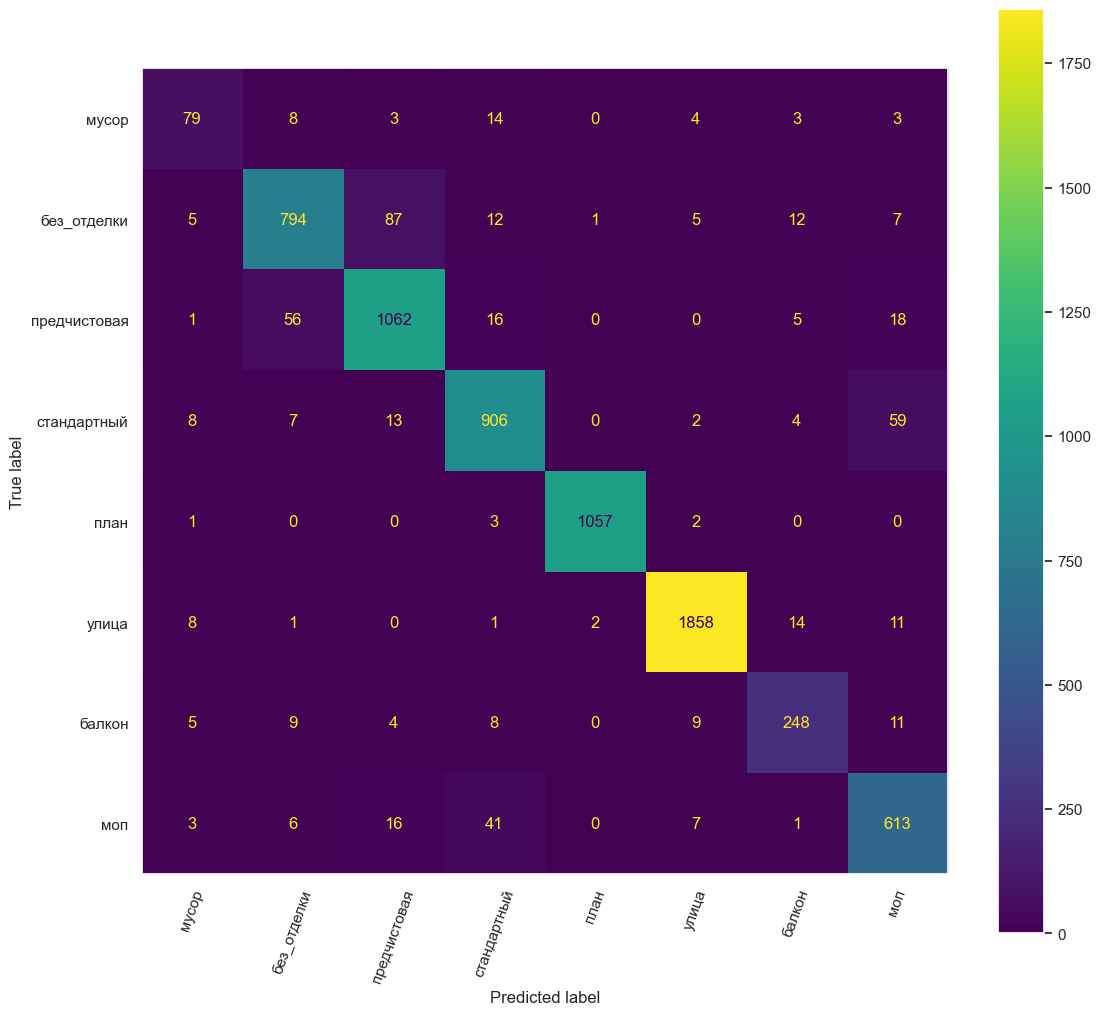

In [8]:
CM = confusion_matrix(Y_test, pred_test)
#print(CM)

#ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = classes)

fig, ax = plt.subplots(figsize = (13, 12))
disp.plot(values_format = '.6g', ax = ax)
plt.xticks(rotation = 70)
plt.grid(False)
plt.show();

Text(0.5, 0, 'CatBoost Feature Importance')

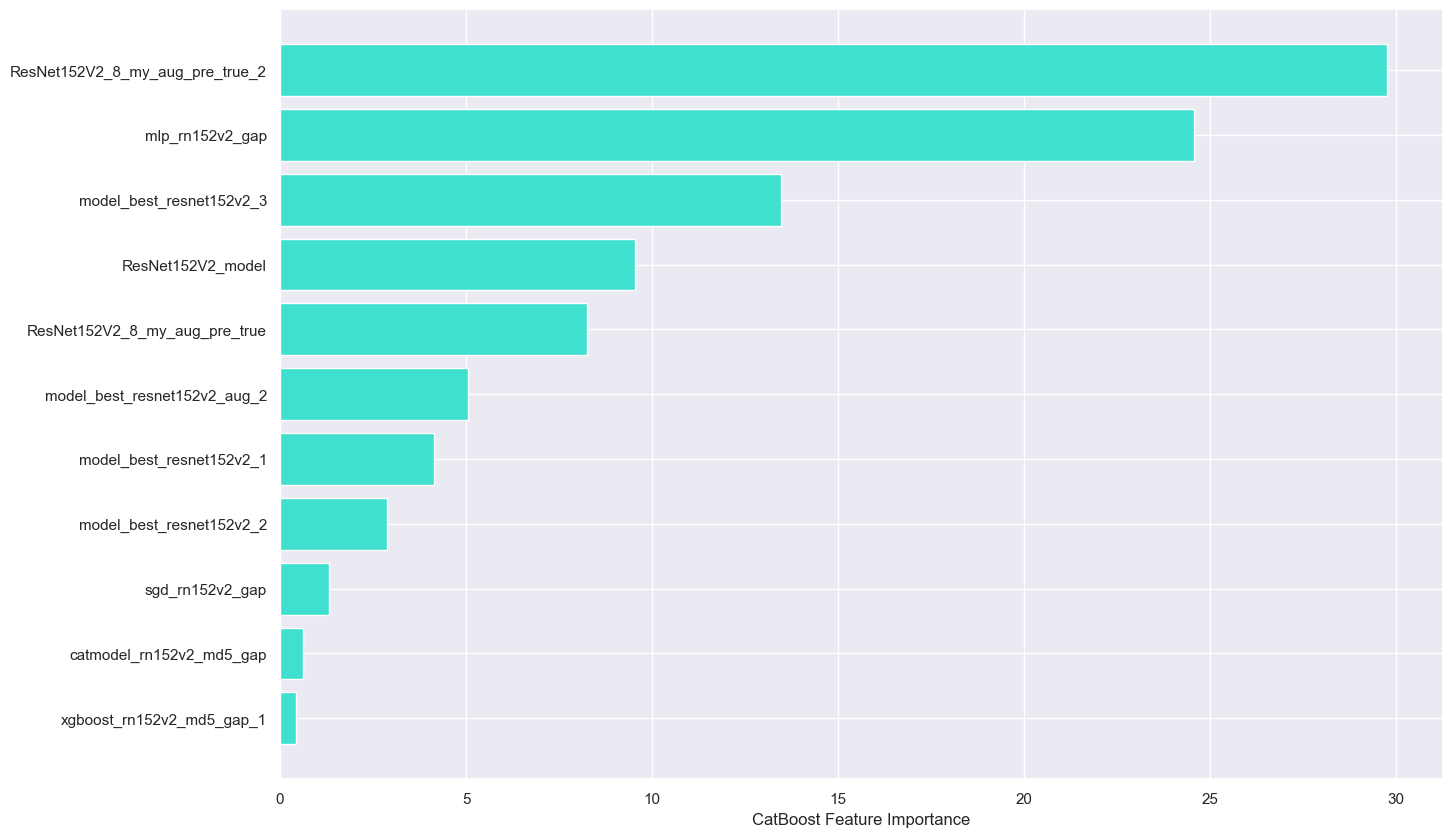

In [9]:
from sklearn.inspection import permutation_importance

feature_names = [
                 'model_best_resnet152v2_1', 
                 'model_best_resnet152v2_2',
                 'model_best_resnet152v2_3', 
                 'ResNet152V2_model',
                 'model_best_resnet152v2_aug_2',
                 'ResNet152V2_8_my_aug_pre_true',
                 'ResNet152V2_8_my_aug_pre_true_2',
                 'catmodel_rn152v2_md5_gap',
                 'xgboost_rn152v2_md5_gap_1',
                 'sgd_rn152v2_gap',
                 'mlp_rn152v2_gap',
                ]
features = np.array(feature_names)

sorted_feature_importance = catc.feature_importances_.argsort()
plt.figure(figsize = (15, 10))
plt.barh(features[sorted_feature_importance], 
         catc.feature_importances_[sorted_feature_importance], 
         color = 'turquoise')
plt.xlabel("CatBoost Feature Importance")

Text(0.5, 0, 'CatBoost Feature Importance')

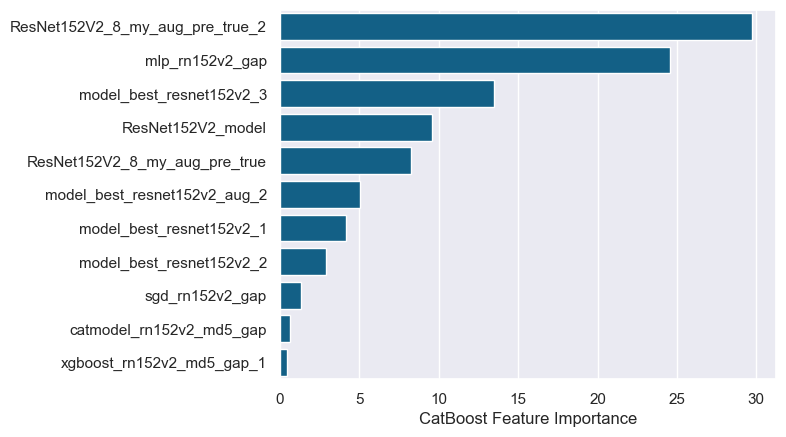

In [10]:
sns.barplot(
            #data = data,
            x = catc.feature_importances_[sorted_feature_importance][::-1], 
            y = features[sorted_feature_importance][::-1],
            #palette = color, #Blues_r
            color = '#006699',
            orient = 'h'
          )

plt.xlabel("CatBoost Feature Importance")

In [11]:
pred_val = catc.predict(X)
#pred_val

In [12]:
classes = [
           'мусор',
           'без_отделки', 
           'предчистовая', 
           #'экономный', 
           'стандартный', 
           #'улучшенный', 
           'план', 
           'улица', 
           'балкон', 
           'моп'
          ]

print("Score:", accuracy_score(pred_val, Y))

#print(xgbc.feature_importances_)
print("\nClassification Report : ")
print(classification_report(Y, pred_val, target_names = classes))

Score: 0.9311601822642832

Classification Report : 
              precision    recall  f1-score   support

       мусор       0.71      0.69      0.70       456
 без_отделки       0.91      0.87      0.89      3692
предчистовая       0.90      0.92      0.91      4633
 стандартный       0.91      0.92      0.91      3996
        план       1.00      0.99      1.00      4252
       улица       0.98      0.98      0.98      7577
      балкон       0.88      0.84      0.86      1176
         моп       0.87      0.90      0.88      2748

    accuracy                           0.93     28530
   macro avg       0.89      0.89      0.89     28530
weighted avg       0.93      0.93      0.93     28530



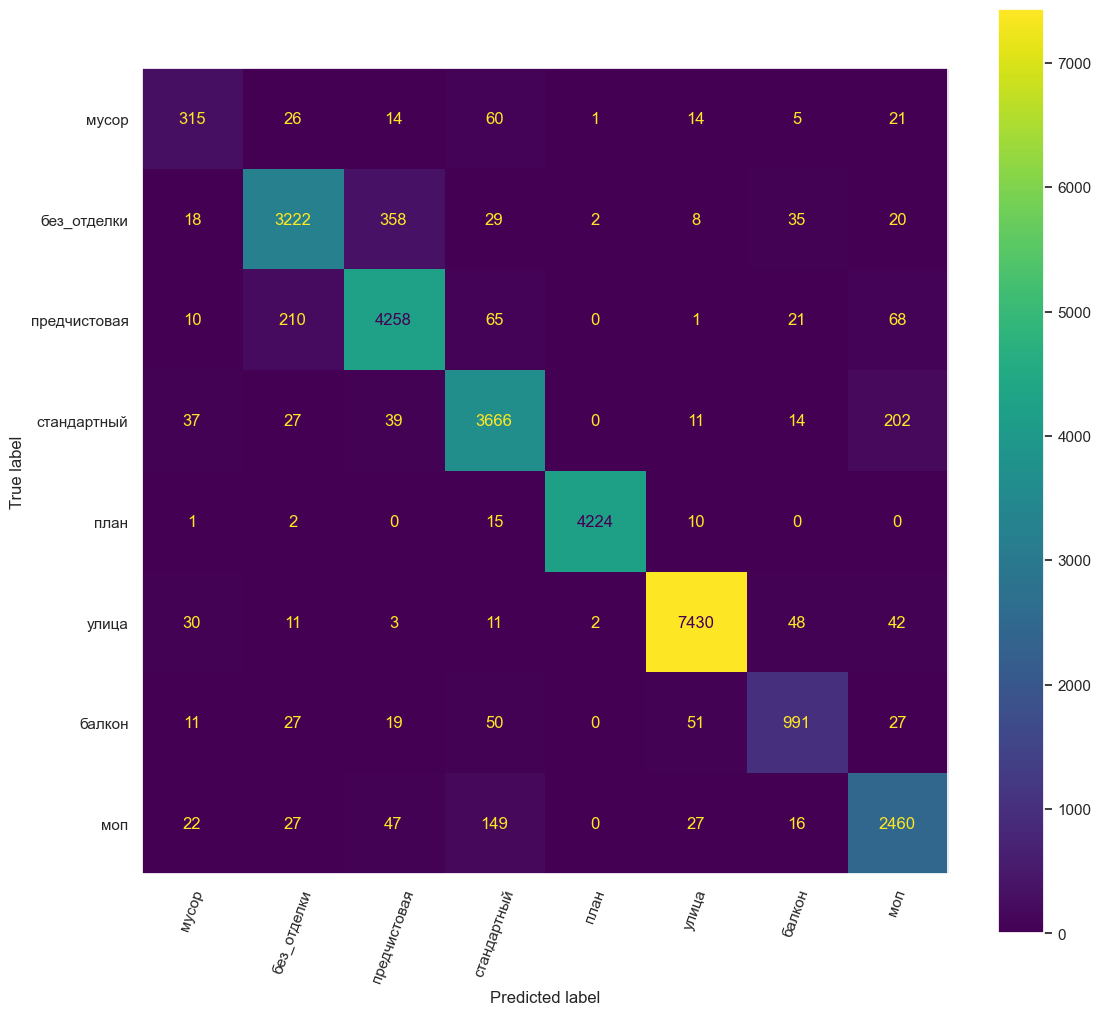

In [13]:
CM = confusion_matrix(Y, pred_val)
#print(CM)

#ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = classes)

fig, ax = plt.subplots(figsize = (13, 12))
disp.plot(values_format = '.6g', ax = ax)
plt.xticks(rotation = 70)
plt.grid(False)
plt.show();

In [113]:
#Сохраняем в Excel
writer = pd.ExcelWriter('pred_отделка_cat.xlsx')
pd.DataFrame(pred_val).to_excel(writer, 'прогноз')
writer.save()

C:\Users\skapr\AppData\Local\Temp\ipykernel_19640\643280150.py:4: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


# XGBoost

In [14]:
X = df[[
        'model_best_resnet152v2_1', 
        'model_best_resnet152v2_2',
        'model_best_resnet152v2_3', 
        'ResNet152V2_model',
        'model_best_resnet152v2_aug_2',
        'ResNet152V2_8_my_aug_pre_true',
        'ResNet152V2_8_my_aug_pre_true_2',
        'catmodel_rn152v2_md5_gap',
        'xgboost_rn152v2_md5_gap_1',
        'sgd_rn152v2_gap',
        'mlp_rn152v2_gap',
        ]]

Y = df['True_2']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0, stratify = Y)

In [16]:
classes = [
           'мусор',
           'без_отделки', 
           'предчистовая', 
           #'экономный', 
           'стандартный', 
           #'улучшенный', 
           'план', 
           'улица', 
           'балкон', 
           'моп'
          ]

params = {
         'objective': 'multi:softmax', #multi:softprob multi:softmax
         'num_class': len(classes),
         'learning_rate': 0.1,
         'max_depth': 5,
         #'subsample': 0.8,
         'colsample_bytree': 0.8,
         'seed': 42,
         'eval_metric': 'mlogloss',
         #'updater': 'refresh',
         #'process_type': 'update',
         #'refresh_leaf': True,
         #'reg_lambda': 3,  # L2
         #'reg_alpha': 3,  # L1
         #'silent': False
        }

train_dmatrix = xgb.DMatrix(data = X_train, label = Y_train) 
test_dmatrix = xgb.DMatrix(data = X_test, label = Y_test)

eval_data = [(train_dmatrix, 'train'), (test_dmatrix, 'eval')]
progress = dict()

xgbc = xgb.train(
                 params = params, 
                 dtrain = train_dmatrix, 
                 num_boost_round = 500,   #количество деревьев
                 evals = eval_data,
                 evals_result = progress,
                 verbose_eval = 0,
                 early_stopping_rounds = 20
                )

pred_train = xgbc.predict(xgb.DMatrix(X_train))
pred_test = xgbc.predict(xgb.DMatrix(X_test))

print("Train score:", accuracy_score(pred_train, Y_train))
print("Test score:", accuracy_score(pred_test, Y_test))

#print(xgbc.feature_importances_)
print("\nClassification Report : ")
print(classification_report(Y_test, pred_test, target_names = classes))

Train score: 0.9537785670888442
Test score: 0.928080751436983

Classification Report : 
              precision    recall  f1-score   support

       мусор       0.66      0.73      0.69       114
 без_отделки       0.90      0.88      0.89       923
предчистовая       0.90      0.90      0.90      1158
 стандартный       0.92      0.90      0.91       999
        план       1.00      1.00      1.00      1063
       улица       0.98      0.98      0.98      1895
      балкон       0.86      0.85      0.86       294
         моп       0.85      0.90      0.87       687

    accuracy                           0.93      7133
   macro avg       0.88      0.89      0.89      7133
weighted avg       0.93      0.93      0.93      7133



In [ ]:
Train score: 0.9537785670888442
Test score: 0.928080751436983

Classification Report : 
              precision    recall  f1-score   support

       мусор       0.66      0.73      0.69       114
 без_отделки       0.90      0.88      0.89       923
предчистовая       0.90      0.90      0.90      1158
 стандартный       0.92      0.90      0.91       999
        план       1.00      1.00      1.00      1063
       улица       0.98      0.98      0.98      1895
      балкон       0.86      0.85      0.86       294
         моп       0.85      0.90      0.87       687

    accuracy                           0.93      7133
   macro avg       0.88      0.89      0.89      7133
weighted avg       0.93      0.93      0.93      7133

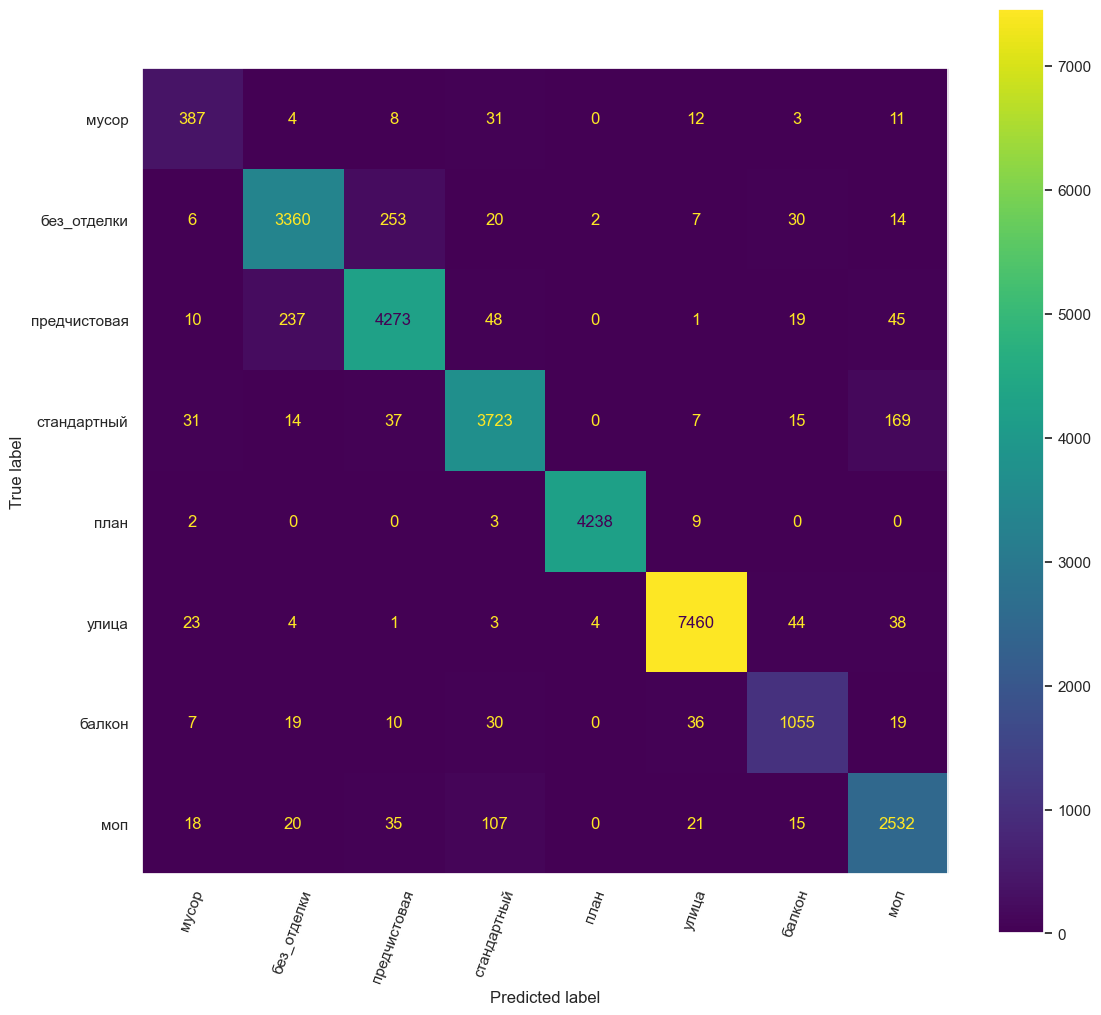

In [17]:
pred_val = xgbc.predict(xgb.DMatrix(X))

CM = confusion_matrix(Y, pred_val)
#print(CM)

#ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = classes)

fig, ax = plt.subplots(figsize = (13, 12))
disp.plot(values_format = '.6g', ax = ax)
plt.xticks(rotation = 70)
plt.grid(False)
plt.show();





In [18]:
print("\nClassification Report : ")
print(classification_report(Y, pred_val, target_names = classes))


Classification Report : 
              precision    recall  f1-score   support

       мусор       0.80      0.85      0.82       456
 без_отделки       0.92      0.91      0.91      3692
предчистовая       0.93      0.92      0.92      4633
 стандартный       0.94      0.93      0.94      3996
        план       1.00      1.00      1.00      4252
       улица       0.99      0.98      0.99      7577
      балкон       0.89      0.90      0.90      1176
         моп       0.90      0.92      0.91      2748

    accuracy                           0.95     28530
   macro avg       0.92      0.93      0.92     28530
weighted avg       0.95      0.95      0.95     28530



In [ ]:
Classification Report : 
              precision    recall  f1-score   support

       мусор       0.75      0.87      0.80       456
 без_отделки       0.92      0.89      0.90      3692
предчистовая       0.91      0.92      0.92      4633
 стандартный       0.92      0.93      0.92      3996
        план       1.00      1.00      1.00      4252
       улица       0.99      0.98      0.99      7577
      балкон       0.87      0.90      0.88      1176
         моп       0.90      0.89      0.89      2748

    accuracy                           0.94     28530
   macro avg       0.91      0.92      0.91     28530
weighted avg       0.94      0.94      0.94     28530

Classification Report : 
              precision    recall  f1-score   support

       мусор       0.72      0.83      0.77       456
 без_отделки       0.91      0.88      0.90      3692
предчистовая       0.90      0.91      0.91      4633
 стандартный       0.92      0.90      0.91      3996
        план       1.00      1.00      1.00      4252
       улица       0.98      0.98      0.98      7577
      балкон       0.84      0.89      0.86      1176
         моп       0.88      0.87      0.87      2748

    accuracy                           0.93     28530
   macro avg       0.89      0.91      0.90     28530
weighted avg       0.93      0.93      0.93     28530

Classification Report : 
              precision    recall  f1-score   support

       мусор       0.80      0.85      0.82       456
 без_отделки       0.92      0.91      0.91      3692
предчистовая       0.93      0.92      0.92      4633
 стандартный       0.94      0.93      0.94      3996
        план       1.00      1.00      1.00      4252
       улица       0.99      0.98      0.99      7577
      балкон       0.89      0.90      0.90      1176
         моп       0.90      0.92      0.91      2748

    accuracy                           0.95     28530
   macro avg       0.92      0.93      0.92     28530
weighted avg       0.95      0.95      0.95     28530

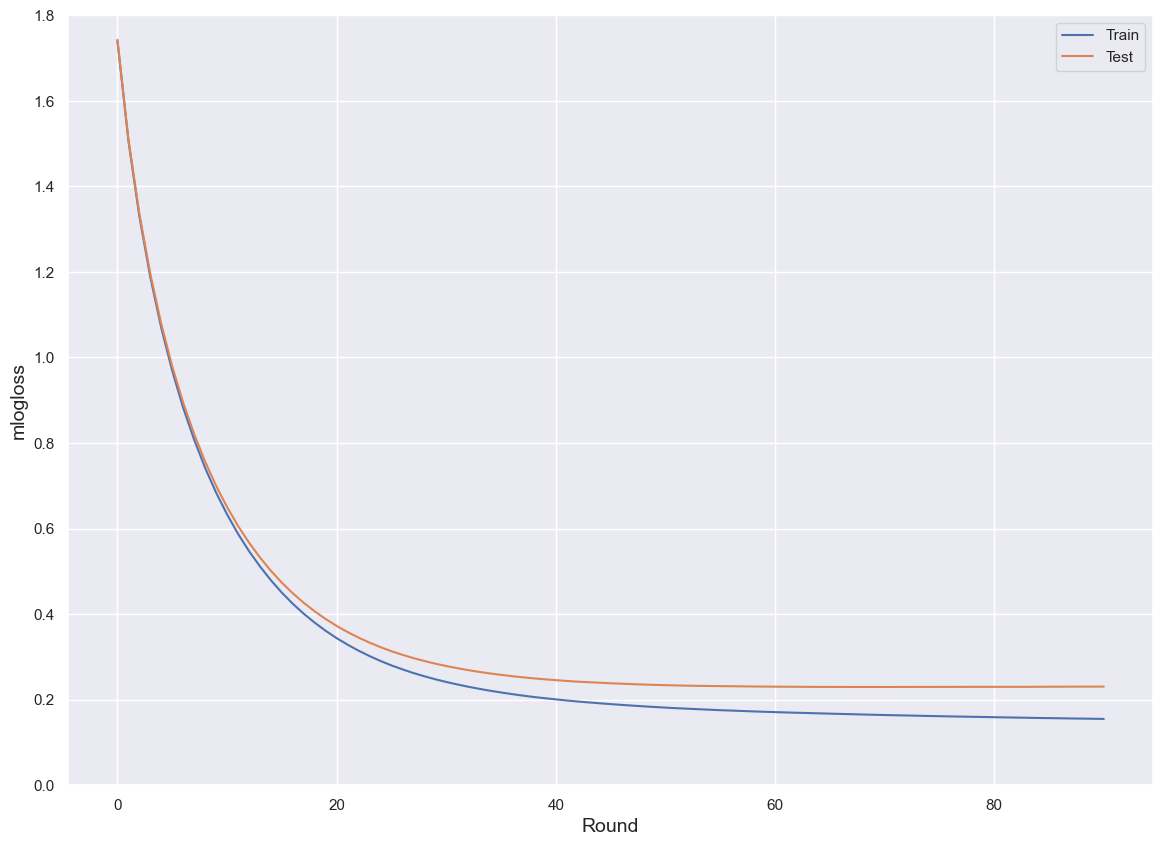

In [19]:
plt.figure(figsize = (14, 10))
plt.rcParams.update({'font.size': 14})
plt.plot(progress['train']['mlogloss'])
plt.plot(progress['eval']['mlogloss'])
plt.ylabel('mlogloss', fontsize = 14)
plt.ylim([0, 1.8])
plt.xlabel('Round', fontsize = 14)
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.show()

In [20]:
xgbc.save_model('xgboost_groupmodels.model')

C:\Users\skapr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:13:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [21]:
xgbc.get_score(importance_type = 'gain')

#feature_important = xgbc.get_booster().get_score(importance_type='weight')

#'weight' - количество раз, когда функция используется для разделения данных по всем деревьям.
#'gain' - средний прирост по всем сплитам, в которых используется функция.
#'cover' - среднее покрытие по всем сплитам, в которых используется функция.
#'total_gain' - общий выигрыш по всем сплитам, в которых используется функция.
#'total_cover' - общий охват по всем сплитам, в которых используется функция.

{'model_best_resnet152v2_1': 1.5179997682571411,
 'model_best_resnet152v2_2': 1.3205931186676025,
 'model_best_resnet152v2_3': 44.88232421875,
 'ResNet152V2_model': 19.31348419189453,
 'model_best_resnet152v2_aug_2': 1.7002583742141724,
 'ResNet152V2_8_my_aug_pre_true': 41.92192840576172,
 'ResNet152V2_8_my_aug_pre_true_2': 54.8536491394043,
 'catmodel_rn152v2_md5_gap': 1.1371111869812012,
 'xgboost_rn152v2_md5_gap_1': 1.3559870719909668,
 'sgd_rn152v2_gap': 1.5452717542648315,
 'mlp_rn152v2_gap': 57.12138748168945}

<Axes: >

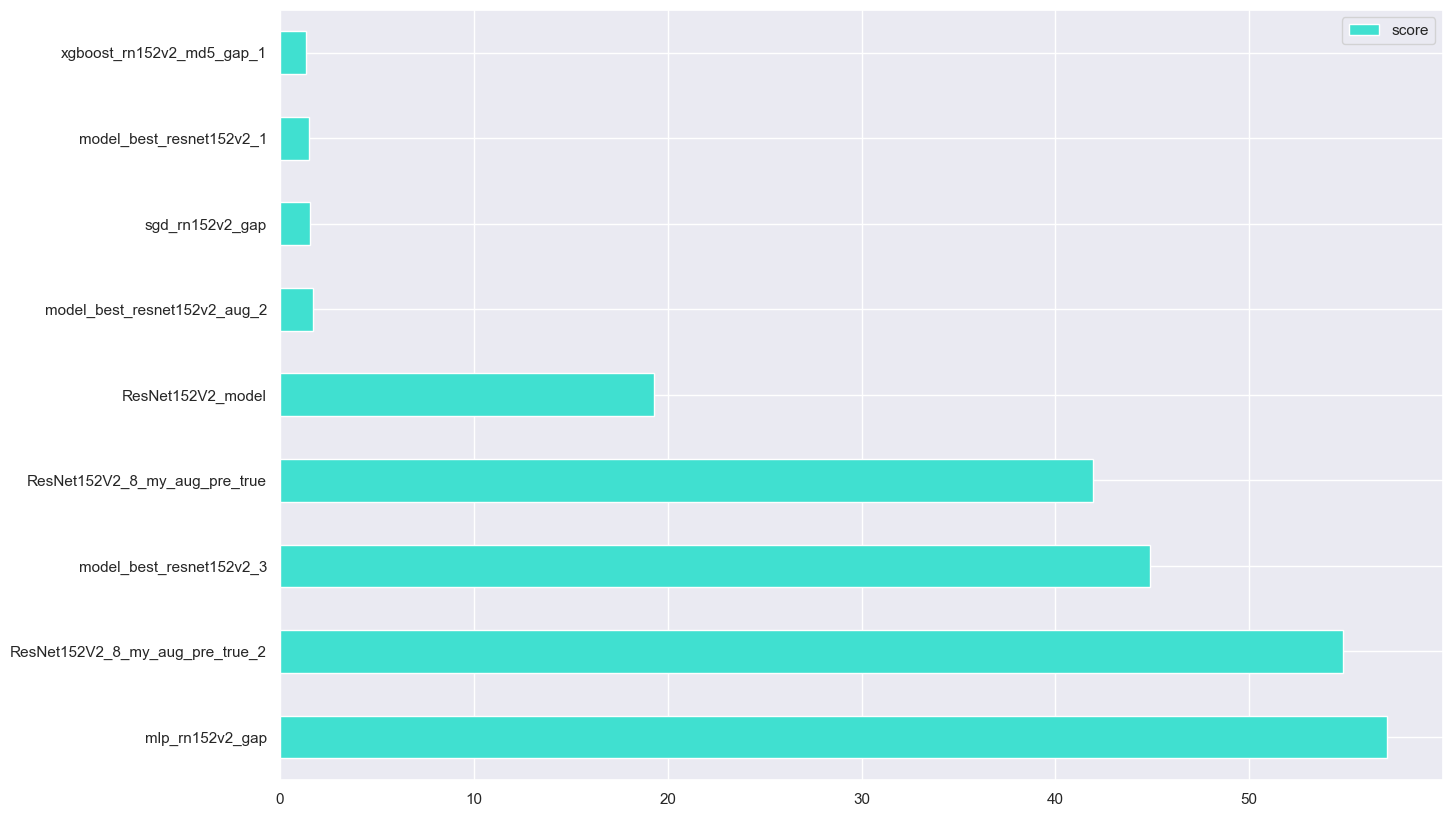

In [22]:
feature_important = xgbc.get_score(importance_type = 'gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data = values, index = keys, columns = ["score"]).sort_values(by = "score", ascending = False)
data.nlargest(9, columns = "score").plot(kind = 'barh', color = 'turquoise', figsize = (15, 10)) ## plot top 9 features

Text(0.5, 0, 'XGBoost Feature Importance')

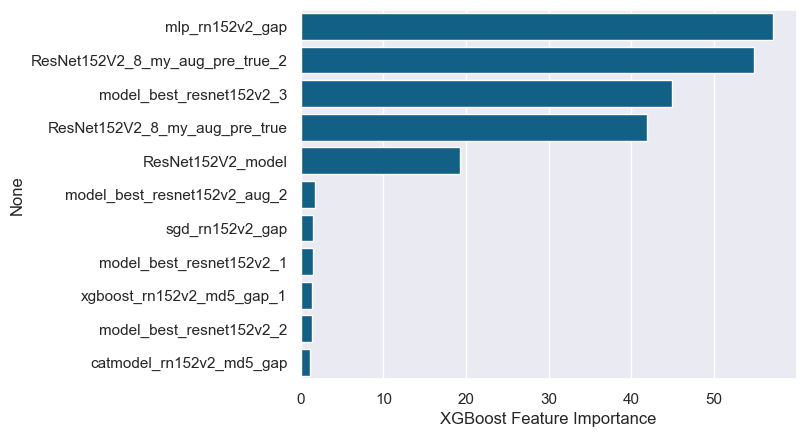

In [23]:
sns.barplot(
            #data = data,
            x = data['score'], 
            y = data.index,
            #palette = color, #Blues_r
            color = '#006699',
            orient = 'h'
          )

plt.xlabel("XGBoost Feature Importance")

In [24]:
#Получаем prob multi:softprob
classes = [
           'мусор',
           'без_отделки', 
           'предчистовая', 
           #'экономный', 
           'стандартный', 
           #'улучшенный', 
           'план', 
           'улица', 
           'балкон', 
           'моп'
          ]

params = {
         'objective': 'multi:softprob', #multi:softprob multi:softmax
         'num_class': len(classes),
         'learning_rate': 0.1,
         'max_depth': 5,
         #'subsample': 0.8,
         'colsample_bytree': 0.8,
         'seed': 42,
         'eval_metric': 'mlogloss',
         #'updater': 'refresh',
         #'process_type': 'update',
         #'refresh_leaf': True,
         #'reg_lambda': 3,  # L2
         #'reg_alpha': 3,  # L1
         #'silent': False
        }

train_dmatrix = xgb.DMatrix(data = X_train, label = Y_train) 
test_dmatrix = xgb.DMatrix(data = X_test, label = Y_test)

eval_data = [(train_dmatrix, 'train'), (test_dmatrix, 'eval')]
progress = dict()

xgbc = xgb.train(
                 params = params, 
                 dtrain = train_dmatrix, 
                 num_boost_round = 500,   #количество деревьев
                 evals = eval_data,
                 evals_result = progress,
                 verbose_eval = 0,
                 early_stopping_rounds = 20
                )

pred_train = xgbc.predict(xgb.DMatrix(X_train))
pred_test = xgbc.predict(xgb.DMatrix(X_test))

print("Train score:", accuracy_score(np.argmax(pred_train, axis = 1), Y_train)) #np.argmax(y_pred_proba, axis = 1)
print("Test score:", accuracy_score(np.argmax(pred_test, axis = 1), Y_test))

#print(xgbc.feature_importances_)
print("\nClassification Report : ")
print(classification_report(Y_test, np.argmax(pred_test, axis = 1), target_names = classes))

Train score: 0.9537785670888442
Test score: 0.928080751436983

Classification Report : 
              precision    recall  f1-score   support

       мусор       0.66      0.73      0.69       114
 без_отделки       0.90      0.88      0.89       923
предчистовая       0.90      0.90      0.90      1158
 стандартный       0.92      0.90      0.91       999
        план       1.00      1.00      1.00      1063
       улица       0.98      0.98      0.98      1895
      балкон       0.86      0.85      0.86       294
         моп       0.85      0.90      0.87       687

    accuracy                           0.93      7133
   macro avg       0.88      0.89      0.89      7133
weighted avg       0.93      0.93      0.93      7133



In [25]:
pred_prob_val = xgbc.predict(xgb.DMatrix(X))
pred_prob_val

array([[1.7774282e-01, 9.9766776e-03, 7.7260911e-02, ..., 5.7787020e-03,
        7.5214640e-03, 1.8746950e-02],
       [5.9064174e-01, 9.4549596e-02, 2.0283565e-02, ..., 8.1691101e-02,
        2.7458033e-02, 8.0164239e-02],
       [1.1837664e-02, 1.7528150e-03, 4.6197064e-03, ..., 7.5860238e-03,
        4.0086634e-03, 4.9847243e-03],
       ...,
       [6.1806629e-04, 1.1097938e-03, 7.9080462e-03, ..., 1.0857875e-02,
        1.0942308e-03, 9.6222651e-01],
       [8.8628381e-04, 2.7339885e-03, 7.6081688e-03, ..., 1.1213560e-02,
        1.6304861e-03, 9.3360156e-01],
       [6.4060552e-04, 7.0976693e-04, 5.2124360e-03, ..., 5.6453045e-03,
        1.2470027e-03, 9.7133768e-01]], dtype=float32)

In [26]:
pred_prob_val

array([[1.7774282e-01, 9.9766776e-03, 7.7260911e-02, ..., 5.7787020e-03,
        7.5214640e-03, 1.8746950e-02],
       [5.9064174e-01, 9.4549596e-02, 2.0283565e-02, ..., 8.1691101e-02,
        2.7458033e-02, 8.0164239e-02],
       [1.1837664e-02, 1.7528150e-03, 4.6197064e-03, ..., 7.5860238e-03,
        4.0086634e-03, 4.9847243e-03],
       ...,
       [6.1806629e-04, 1.1097938e-03, 7.9080462e-03, ..., 1.0857875e-02,
        1.0942308e-03, 9.6222651e-01],
       [8.8628381e-04, 2.7339885e-03, 7.6081688e-03, ..., 1.1213560e-02,
        1.6304861e-03, 9.3360156e-01],
       [6.4060552e-04, 7.0976693e-04, 5.2124360e-03, ..., 5.6453045e-03,
        1.2470027e-03, 9.7133768e-01]], dtype=float32)

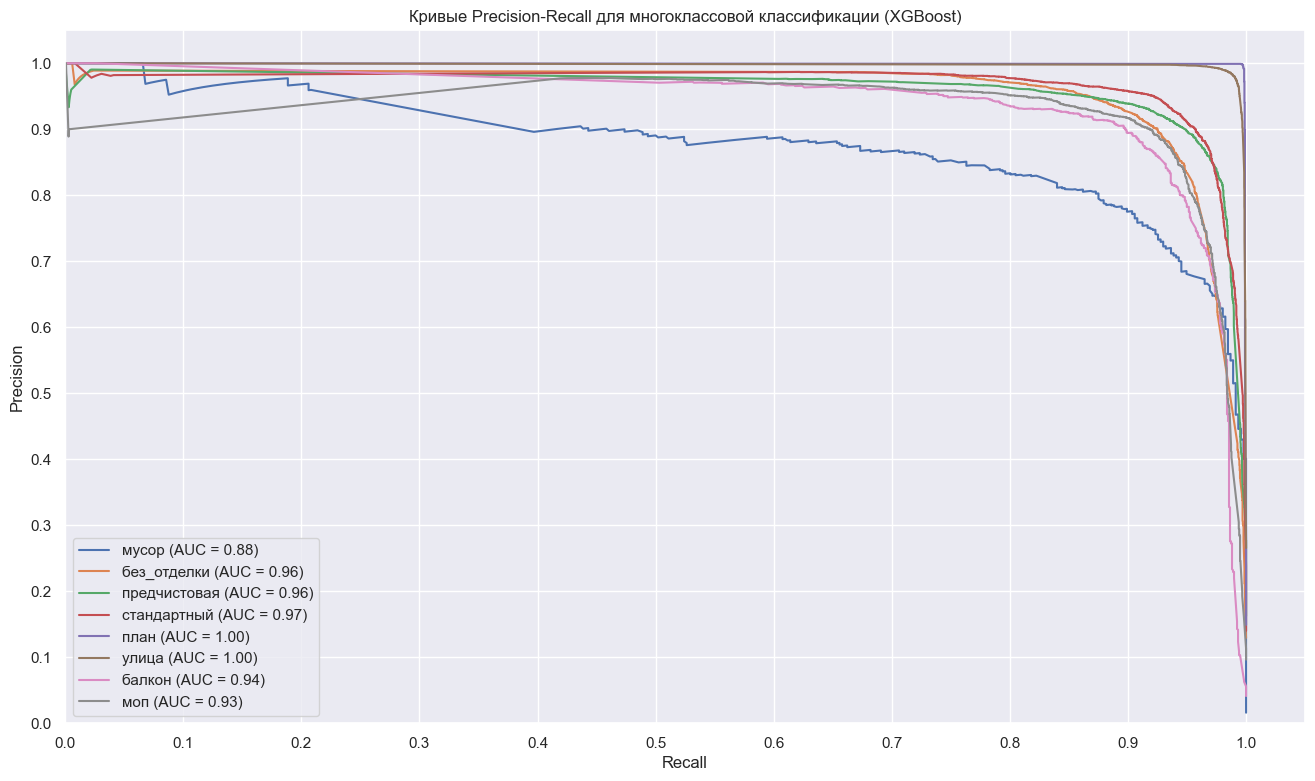

In [27]:
import numpy as np
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Представьте, что у вас есть истинные метки и вероятности предсказания
y_true = np.array(df['True_2']) # истинные метки
y_pred_proba = pred_prob_val # вероятности для каждого класса

# Количество классов
n_classes = len(y_pred_proba[0])

# Массивы для хранения данных Precision-Recall
precision = dict()
recall = dict()
average_precision = dict()

classes = [
           'мусор',
           'без_отделки', 
           'предчистовая', 
           #'экономный', 
           'стандартный', 
           #'улучшенный', 
           'план', 
           'улица', 
           'балкон', 
           'моп'
          ]

# Строим кривые Precision-Recall для каждого класса
for i in range(n_classes):
    precision[i], recall[i], tr = precision_recall_curve(y_true == i, y_pred_proba[:, i])
    average_precision[i] = auc(recall[i], precision[i])

# Строим графики Precision-Recall для каждого класса
plt.figure(figsize = (16, 9))
for i in range(n_classes):
    plt.plot(
             recall[i],
             precision[i],
             label = f"{classes[i]} (AUC = {average_precision[i]:.2f})",
            )

# Настраиваем график
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Кривые Precision-Recall для многоклассовой классификации (XGBoost)")
plt.legend(loc = "lower left")
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xticks(np.arange(0, 1.05, 0.1))
plt.yticks(np.arange(0, 1.05, 0.1))
plt.show()


In [30]:
#Сохраняем в Excel
writer = pd.ExcelWriter('pred_отделка_xgb.xlsx')
pd.DataFrame(pred_val).to_excel(writer, 'прогноз')
writer._save()

C:\Users\skapr\AppData\Local\Temp\ipykernel_6416\3150029912.py:4: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Предположим, что у вас есть прогнозы пяти моделей в массиве predictions
# predictions.shape = (n_samples, 5)  -  n_samples - количество образцов
# y_true - истинные метки классов (n_samples,)

predictions = np.random.randint(0, 8, size=(1000, 5)) # Пример случайных данных
y_true = np.random.randint(0, 8, size=1000) # Пример случайных истинных меток

# Разделим данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(predictions, y_true, test_size=0.2, stratify=y_true, random_state=42)


# Методы балансировки данных

# 1.  Взвешивание классов в XGBoost
#   -  Самый простой способ. XGBoost сам обрабатывает веса.

w_train = np.bincount(y_train)
weights = 1. / w_train[y_train] #обратные веса классов для  балансировки


dtrain = xgb.DMatrix(X_train, label=y_train, weight=weights)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'multi:softmax',
    'num_class': 8,
    'eval_metric': 'merror', # или mlogloss
    'seed': 42
}

model_xgb = xgb.train(params, dtrain, num_boost_round=100)  # Настройте num_boost_round

y_pred = model_xgb.predict(dtest)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



# 2.  Oversampling (SMOTE) -  Увеличиваем количество образцов в меньшинстве

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f"Original dataset shape {Counter(y_train)}")
print(f"Resampled dataset shape {Counter(y_train_smote)}")

model_xgb_smote = xgb.XGBClassifier(objective='multi:softmax', num_class=8, eval_metric='merror', seed=42)
model_xgb_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_xgb_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))
print(confusion_matrix(y_test, y_pred_smote))



# 3. Undersampling (RandomUnderSampler) - Уменьшаем количество образцов в большинстве

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print(f"Original dataset shape {Counter(y_train)}")
print(f"Resampled dataset shape {Counter(y_train_rus)}")

model_xgb_rus = xgb.XGBClassifier(objective='multi:softmax', num_class=8, eval_metric='merror', seed=42)
model_xgb_rus.fit(X_train_rus, y_train_rus)
y_pred_rus = model_xgb_rus.predict(X_test)
print(classification_report(y_test, y_pred_rus))
print(confusion_matrix(y_test, y_pred_rus))

# 4.  Комбинация oversampling и undersampling (например, SMOTE + Tomek links)  - более сложные методы


# Не забудьте установить необходимые библиотеки: pip install xgboost scikit-learn imbalanced-learn

# SVM

In [4]:
X = df[[
        'model_best_resnet152v2_1', 
        'model_best_resnet152v2_2',
        'model_best_resnet152v2_3', 
        'ResNet152V2_model',
        'model_best_resnet152v2_aug_2', 
        'catmodel_rn152v2_md5_gap',
        'xgboost_rn152v2_md5_gap_1',
        'sgd_rn152v2_gap',
        'mlp_rn152v2_gap',
        ]]

Y = df['True_2']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0, stratify = Y)

In [66]:
from sklearn.model_selection import GridSearchCV

# Определение диапазона значений для C и gamma с использованием логарифмической шкалы
C_range = np.logspace(-5, 5, 10) # 10 значений от 10^-5 до 10^5
gamma_range = np.logspace(-10, 10, 10) # 10 значений от 10^-10 до 10^10

param_grid = {
              'C': C_range,                 #C_range, [0.1, 1, 10]
              'gamma': gamma_range,           #gamma_range, [0.01, 0.1, 1]
            }

svm_model = SVC(
                kernel = 'rbf', 
                decision_function_shape = 'ovo'
               )

grid_search = GridSearchCV(
                           svm_model, 
                           param_grid, 
                           cv = 5
                          )

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params)
print(best_model)

{'C': 3.593813663804626, 'gamma': 0.07742636826811278}
SVC(C=3.593813663804626, decision_function_shape='ovo',
    gamma=0.07742636826811278)


Гиперпараметр C

• Диапазон: [10^-5, 10^5]

• Значение: Регулирует компромисс между точностью на обучающих данных и способностью к обобщению на новых данных.
• Высокое значение C: 
  - Более сложная модель, которая старается идеально подогнаться под обучающие данные.
  - Риск переобучения (overfitting), когда модель плохо работает на новых данных.

• Низкое значение C: 
  - Более простая модель, которая допускает некоторые ошибки на обучающих данных.
  - Может лучше обобщаться на новые данные, но может не быть достаточно точной на обучающих данных.

Гиперпараметр gamma

• Диапазон: [10^-10, 10^10] (но часто используется более узкий диапазон)
• Значение: Определяет область влияния каждой опорной точки.

• Высокое значение gamma:
  - Модель с узкой областью влияния опорных точек.
  - Способна создавать очень сложные модели, которые хорошо работают на обучающих данных, но могут переобучаться.

• Низкое значение gamma:
  - Модель с широкой областью влияния опорных точек.
  - Создает более простые модели, которые могут быть менее точными на обучающих данных, но лучше обобщаются.

In [70]:
# C_range = np.logspace(-5, 5, 10)
# C_range

gamma_range = np.logspace(-10, 10, 10)
gamma_range

array([1.00000000e-10, 1.66810054e-08, 2.78255940e-06, 4.64158883e-04,
       7.74263683e-02, 1.29154967e+01, 2.15443469e+03, 3.59381366e+05,
       5.99484250e+07, 1.00000000e+10])

In [8]:
from sklearn.model_selection import GridSearchCV

# Определение диапазона значений для C и gamma с использованием логарифмической шкалы
# C_range = np.logspace(-5, 5, 10) # 10 значений от 10^-5 до 10^5
# gamma_range = np.logspace(-10, 10, 10) # 10 значений от 10^-10 до 10^10

param_grid = {
              'C': [2.5, 2.6, 2.7, 2.8, 2.9], 
              'gamma': [0.031, 0.032, 0.033, 0.034, 0.035],
            }

svm_model = SVC(
                kernel = 'rbf', 
                decision_function_shape = 'ovo'
               )

grid_search = GridSearchCV(
                           svm_model, 
                           param_grid, 
                           cv = 5
                          )

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params)
print(best_model)

{'C': 2.8, 'gamma': 0.033}
SVC(C=2.8, decision_function_shape='ovo', gamma=0.033)


In [9]:
classes = [
           'мусор',
           'без_отделки', 
           'предчистовая', 
           #'экономный', 
           'стандартный', 
           #'улучшенный', 
           'план', 
           'улица', 
           'балкон', 
           'моп'
          ]

svm_model = SVC(
                kernel = 'rbf', 
                gamma = 0.033,  #'scale'
                C = 2.8, 
                decision_function_shape = 'ovo'
            )

# Обучение модели
svm_model.fit(X_train, Y_train)


pred_train = svm_model.predict(X_train)
pred_test = svm_model.predict(X_test)

print("Train score:", accuracy_score(pred_train, Y_train))
print("Test score:", accuracy_score(pred_test, Y_test))

#print(xgbc.feature_importances_)
print("\nClassification Report : ")
print(classification_report(Y_test, pred_test, target_names = classes))

#kernel='rbf': Используем радиально-базисную функцию (RBF) в качестве ядра. Это обычный выбор для нелинейных задач.
#gamma='scale': Параметр, влияющий на ширину ядра. 'scale' автоматически использует 1 / (n_features * X.var()).
#C=1.0: Регуляризационный параметр. Высокая стоимость C заставляет модель лучше подстраиваться под обучающие данные. 
#Низкие значения приводят к более простой модели.
#decision_function_shape='ovo': Позволяет использовать «один против одного» метод для многоклассовой классификации.

Train score: 0.9288217974482404
Test score: 0.9021449600448619

Classification Report : 
              precision    recall  f1-score   support

       мусор       0.54      0.71      0.61       114
 без_отделки       0.88      0.83      0.86       923
предчистовая       0.87      0.89      0.88      1158
 стандартный       0.86      0.87      0.86       999
        план       1.00      0.99      0.99      1063
       улица       0.98      0.97      0.97      1895
      балкон       0.79      0.79      0.79       294
         моп       0.82      0.83      0.82       687

    accuracy                           0.90      7133
   macro avg       0.84      0.86      0.85      7133
weighted avg       0.90      0.90      0.90      7133



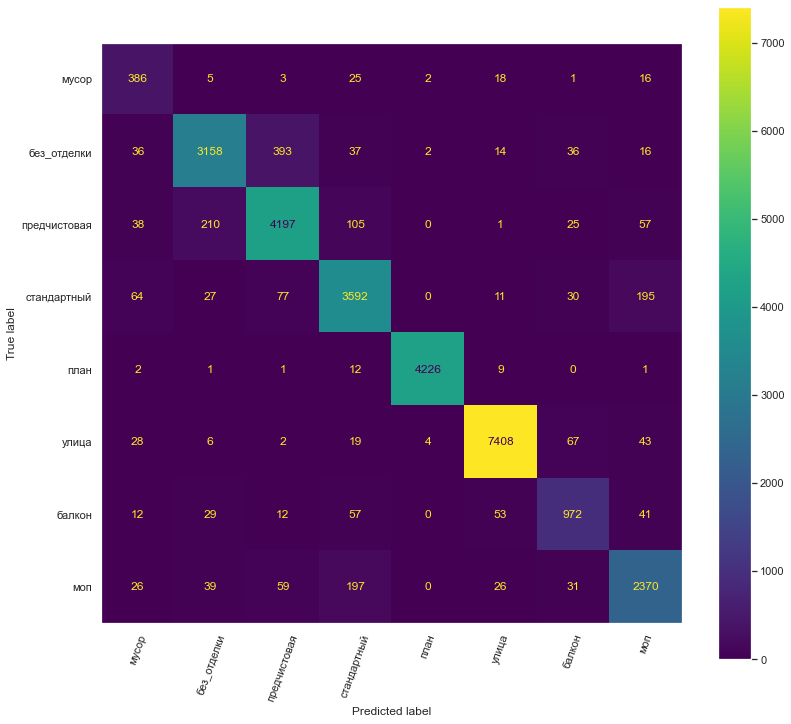

In [10]:
pred_val = svm_model.predict(X)

CM = confusion_matrix(Y, pred_val)
#print(CM)

#ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = classes)

fig, ax = plt.subplots(figsize = (13, 12))
disp.plot(values_format = '.6g', ax = ax)
plt.xticks(rotation = 70)
plt.grid(False)
plt.show();

# NN

In [278]:
import tensorflow
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [259]:
X = df[[
        'model_best_resnet152v2_1', 
        'model_best_resnet152v2_2',
        'model_best_resnet152v2_3', 
        'ResNet152V2_model',
        'model_best_resnet152v2_aug_2', 
        'catmodel_rn152v2_md5_gap',
        #'xgboost_rn152v2_md5_gap_1'
        ]]

Y = df['True_2']

In [260]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0, stratify = Y)

In [261]:
mean = X_train.mean(axis = 0) # вычисляем среднее
X_train -= mean # отнимаем среднее
std = X_train.std(axis = 0) # вычисляем стандартное отклонение
X_train /= std # делим на стандартное отклонение

# для подготовки тестовых данных делаем аналогично
X_test -= mean # отнимаем
X_test /= std # делим

In [280]:
Y_train_ohe = tensorflow.keras.utils.to_categorical(Y_train, num_classes = 8)
Y_test_ohe = tensorflow.keras.utils.to_categorical(Y_test, num_classes = 8)
Y_train_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [281]:
model = Sequential()
model.add(Dense(256, activation = 'relu', input_shape = (X_train.shape[1], )))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(8, activation = 'softmax'))

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 256)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,288 (176.91 KB)

 Trainable params: 45,288 (176.91 KB)

 Non-trainable params: 0 (0.00 B)

In [282]:
# Компиляция модели
model.compile(loss = 'categorical_crossentropy', #у нас 8 классов
              optimizer = 'adam',
              metrics = ['accuracy']
             )

In [283]:
epochs = 30

hist = model.fit(X_train, Y_train_ohe,
                 epochs = epochs,
                 batch_size = 128,
                 verbose = 1,
                 validation_data = (X_test, Y_test_ohe))

Epoch 1/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4933 - loss: 1.4313 - val_accuracy: 0.8786 - val_loss: 0.4580
Epoch 2/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8772 - loss: 0.4198 - val_accuracy: 0.8870 - val_loss: 0.3827
Epoch 3/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8926 - loss: 0.3578 - val_accuracy: 0.8996 - val_loss: 0.3612
Epoch 4/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9006 - loss: 0.3329 - val_accuracy: 0.9026 - val_loss: 0.3393
Epoch 5/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9044 - loss: 0.3225 - val_accuracy: 0.9009 - val_loss: 0.3371
Epoch 6/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9057 - loss: 0.3161 - val_accuracy: 0.9024 - val_loss: 0.3362
Epoch 7/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9063 - loss: 0.3106 - val_accuracy: 0.9051 - val_loss: 0.3198
Epoch 8/30
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9115 - loss: 0.3001 - val_accuracy: 0.

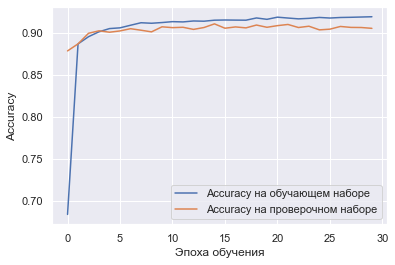

In [287]:
# Считаем графики ошибки
plt.plot(hist.history['accuracy'], 
         label = 'Accuracy на обучающем наборе')
plt.plot(hist.history['val_accuracy'], 
         label = 'Accuracy на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

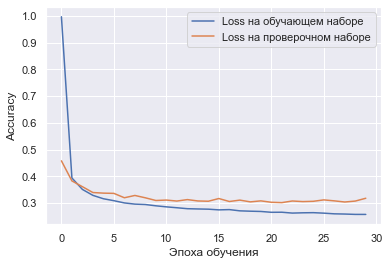

In [288]:
# Считаем графики ошибки
plt.plot(hist.history['loss'], 
         label = 'Loss на обучающем наборе')
plt.plot(hist.history['val_loss'], 
         label = 'Loss на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Итог_1

In [217]:
classes = [
           'мусор',
           'без_отделки', 
           'предчистовая', 
           #'экономный', 
           'стандартный', 
           #'улучшенный', 
           'план', 
           'улица', 
           'балкон', 
           'моп'
          ]

print("Score:", accuracy_score(df['Итог_1'], df['True_2']))

#print(xgbc.feature_importances_)
print("\nClassification Report : ")
print(classification_report(df['True_2'], df['Итог_1'], target_names = classes))

Score: 0.9067648089730108

Classification Report : 
              precision    recall  f1-score   support

       мусор       0.46      0.67      0.55       456
 без_отделки       0.91      0.84      0.87      3692
предчистовая       0.88      0.90      0.89      4633
 стандартный       0.89      0.86      0.87      3996
        план       1.00      0.99      1.00      4252
       улица       0.98      0.97      0.98      7577
      балкон       0.76      0.82      0.79      1176
         моп       0.81      0.83      0.82      2748

    accuracy                           0.91     28530
   macro avg       0.84      0.86      0.85     28530
weighted avg       0.91      0.91      0.91     28530



# Итог_2

In [218]:
classes = [
           'мусор',
           'без_отделки', 
           'предчистовая', 
           #'экономный', 
           'стандартный', 
           #'улучшенный', 
           'план', 
           'улица', 
           'балкон', 
           'моп'
          ]

print("Score:", accuracy_score(df['Итог_2'], df['True_2']))

#print(xgbc.feature_importances_)
print("\nClassification Report : ")
print(classification_report(df['True_2'], df['Итог_2'], target_names = classes))

Score: 0.9056782334384859

Classification Report : 
              precision    recall  f1-score   support

       мусор       0.47      0.64      0.54       456
 без_отделки       0.90      0.84      0.87      3692
предчистовая       0.88      0.89      0.89      4633
 стандартный       0.88      0.86      0.87      3996
        план       1.00      0.99      1.00      4252
       улица       0.98      0.97      0.98      7577
      балкон       0.76      0.81      0.79      1176
         моп       0.80      0.83      0.82      2748

    accuracy                           0.91     28530
   macro avg       0.84      0.86      0.84     28530
weighted avg       0.91      0.91      0.91     28530



# Итог_3

In [219]:
classes = [
           'мусор',
           'без_отделки', 
           'предчистовая', 
           #'экономный', 
           'стандартный', 
           #'улучшенный', 
           'план', 
           'улица', 
           'балкон', 
           'моп'
          ]

print("Score:", accuracy_score(df['Итог_3'], df['True_2']))

#print(xgbc.feature_importances_)
print("\nClassification Report : ")
print(classification_report(df['True_2'], df['Итог_3'], target_names = classes))

Score: 0.9069050122677883

Classification Report : 
              precision    recall  f1-score   support

       мусор       0.48      0.66      0.55       456
 без_отделки       0.91      0.84      0.87      3692
предчистовая       0.88      0.90      0.89      4633
 стандартный       0.89      0.86      0.87      3996
        план       1.00      0.99      1.00      4252
       улица       0.98      0.98      0.98      7577
      балкон       0.77      0.82      0.79      1176
         моп       0.81      0.83      0.82      2748

    accuracy                           0.91     28530
   macro avg       0.84      0.86      0.85     28530
weighted avg       0.91      0.91      0.91     28530



# Итог_4

In [220]:
classes = [
           'мусор',
           'без_отделки', 
           'предчистовая', 
           #'экономный', 
           'стандартный', 
           #'улучшенный', 
           'план', 
           'улица', 
           'балкон', 
           'моп'
          ]

print("Score:", accuracy_score(df['Итог_4'], df['True_2']))

#print(xgbc.feature_importances_)
print("\nClassification Report : ")
print(classification_report(df['True_2'], df['Итог_4'], target_names = classes))

Score: 0.9029793200140204

Classification Report : 
              precision    recall  f1-score   support

       мусор       0.44      0.67      0.53       456
 без_отделки       0.92      0.83      0.87      3692
предчистовая       0.86      0.91      0.88      4633
 стандартный       0.90      0.83      0.86      3996
        план       1.00      0.99      1.00      4252
       улица       0.98      0.97      0.98      7577
      балкон       0.78      0.81      0.79      1176
         моп       0.80      0.83      0.81      2748

    accuracy                           0.90     28530
   macro avg       0.83      0.86      0.84     28530
weighted avg       0.91      0.90      0.90     28530



# Тест Avito

In [29]:
from keras.models import load_model
import keras.utils as image
import pickle

from catboost import CatBoostClassifier
import xgboost as xgb

import tensorflow
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input as pi_rnv2
from tensorflow.keras.layers import GlobalAveragePooling2D

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [128]:
#Лучшая модель NN
model = load_model('ResNet152V2_model.h5')
# model.compile(loss = 'categorical_crossentropy',
#               optimizer = 'adam',
#               metrics = ['accuracy']
#              )

In [139]:
classes = [
           'мусор',
           'без_отделки', 
           'предчистовая', 
           'стандартный', 
           'план', 
           'улица', 
           'балкон', 
           'моп'
          ]

val_path = "D:\\Стас\\Ученье - Свет\\Оценка\\Аспирантура\\Видео по NN, Data mining, ABC и т.д\\Распределение Гаусса, регрессия\\Python\\!Наработки\\Отделка_2\\Тест_avito\\стандартный"
val_names = os.listdir(val_path)

itog = []

for i, name in tqdm(enumerate(val_names), 'Обработано', position = 0):
    class_path = val_path + '\\' + name
    img_names = os.listdir(class_path)

    img_trash_all = []
    img_wf_all = []
    img_prefin_all = []
    img_stand_all = []
    img_plan_all = []
    img_street_all = []
    img_balc_all = []
    img_mop_all = []

    #features_ = []

    for img_name in tqdm(img_names, 'Обработано', position = 0):
        img_i = image.load_img(class_path + '\\' + img_name, target_size = (224, 224))
        x = image.img_to_array(img_i)
        x = np.expand_dims(x, axis = 0)
        #x = preprocess_input(x)                    #добавляем, если использовали при обучении
        x /= 255.
        preds_prob = model.predict(x, verbose = None)
        #preds = np.round(preds[0][i], 0)
        preds = np.argmax(preds_prob, axis = 1)[0]
        #features_.append(preds)
        
        if preds == 0:
            img_trash_all.append(img_name)
        elif preds == 1:
            img_wf_all.append(img_name)
        elif preds == 2:
            img_prefin_all.append(img_name)
        elif preds == 3:
            img_stand_all.append(img_name)
        elif preds == 4:
            img_plan_all.append(img_name)
        elif preds == 5:
            img_street_all.append(img_name)
        elif preds == 6:
            img_balc_all.append(img_name)
        else:
            img_mop_all.append(img_name)

    l_all = len(img_wf_all) + len(img_prefin_all) + len(img_stand_all) + 0.000001
    probs = {'wf': round(len(img_wf_all) / l_all, 2), 
             'prefin': round(len(img_prefin_all) / l_all, 2), 
             'stand': round(len(img_stand_all) / l_all, 2)
            }
    predict = list(probs.keys())[np.argmax(list(probs.values()))]
    
    flat = {f'{classes[0]}_(trash)': img_trash_all,
            f'{classes[1]}_(wf)': img_wf_all,
            f'{classes[2]}_(prefin)': img_prefin_all,
            f'{classes[3]}_(stand)': img_stand_all,
            f'{classes[4]}_(plan)': img_plan_all,
            f'{classes[5]}_(street)': img_street_all,
            f'{classes[6]}_(balc)': img_balc_all,
            f'{classes[7]}_(mop)': img_mop_all,
            'Probs': probs,
            'Predict': predict
           }

    itog.append(flat)

df_itog = pd.DataFrame(itog)

df_itog

C:\Users\skapr\AppData\Local\Temp\ipykernel_7232\3668142795.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, name in tqdm(enumerate(val_names), 'Обработано', position = 0):


Обработано: 0it [00:00, ?it/s]

C:\Users\skapr\AppData\Local\Temp\ipykernel_7232\3668142795.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img_name in tqdm(img_names, 'Обработано', position = 0):


Обработано:   0%|          | 0/8 [00:00<?, ?it/s]

Обработано:   0%|          | 0/7 [00:00<?, ?it/s]

Обработано:   0%|          | 0/21 [00:00<?, ?it/s]

Обработано:   0%|          | 0/20 [00:00<?, ?it/s]

Обработано:   0%|          | 0/24 [00:00<?, ?it/s]

Обработано:   0%|          | 0/32 [00:00<?, ?it/s]

Обработано:   0%|          | 0/23 [00:00<?, ?it/s]

Обработано:   0%|          | 0/28 [00:00<?, ?it/s]

Обработано:   0%|          | 0/27 [00:00<?, ?it/s]

Обработано:   0%|          | 0/10 [00:00<?, ?it/s]

Обработано:   0%|          | 0/8 [00:00<?, ?it/s]

Обработано:   0%|          | 0/4 [00:00<?, ?it/s]

Обработано:   0%|          | 0/9 [00:00<?, ?it/s]

Обработано:   0%|          | 0/6 [00:00<?, ?it/s]

Обработано:   0%|          | 0/9 [00:00<?, ?it/s]

Обработано:   0%|          | 0/7 [00:00<?, ?it/s]

Обработано:   0%|          | 0/9 [00:00<?, ?it/s]

,мусор_(trash),без_отделки_(wf),предчистовая_(prefin),стандартный_(stand),план_(plan),улица_(street),балкон_(balc),моп_(mop),Probs,Predict
0,[],[],[],"[1_stand_1.jpg, 1_stand_2.jpg, 1_stand_3.jpg, ...",[],[],[1_balc_7.jpg],[],"{'wf': 0.0, 'prefin': 0.0, 'stand': 1.0}",stand
1,[],[],[],"[10_stand_1.jpg, 10_stand_2.jpg, 10_stand_3.jp...",[],[10_street_4.jpg],[],[],"{'wf': 0.0, 'prefin': 0.0, 'stand': 1.0}",stand
2,[],[],"[11_mop_15.jpg, 11_stand_16.jpg, 11_stand_20.j...","[11_mop_17.jpg, 11_stand_10.jpg, 11_stand_2.jp...",[11_plan_1.jpg],"[11_balc_11.jpg, 11_street_12.jpg, 11_street_1...",[],"[11_mop_13.jpg, 11_mop_19.jpg, 11_mop_8.jpg, 1...","{'wf': 0.0, 'prefin': 0.44, 'stand': 0.56}",stand
3,"[12_street_19.jpg, 12_trash_12.jpg]",[],[],"[12_stand_10.jpg, 12_stand_13.jpg, 12_stand_14...",[],"[12_street_17.jpg, 12_street_2.jpg]","[12_balc_1.jpg, 12_balc_11.jpg, 12_balc_18.jpg...",[12_mop_8.jpg],"{'wf': 0.0, 'prefin': 0.0, 'stand': 1.0}",stand
4,[13_stand_7.jpg],[],[],"[13_stand_1.jpg, 13_stand_10.jpg, 13_stand_11....",[],"[13_street_19.jpg, 13_street_20.jpg, 13_street...",[13_stand_8.jpg],"[13_mop_16.jpg, 13_mop_17.jpg, 13_mop_18.jpg, ...","{'wf': 0.0, 'prefin': 0.0, 'stand': 1.0}",stand
5,[14_trash_23.jpg],[],"[14_mop_8.jpg, 14_trash_10.jpg]","[14_balc_4.jpg, 14_stand_1.jpg, 14_stand_11.jp...",[],"[14_street_12.jpg, 14_street_31.jpg, 14_street...","[14_balc_14.jpg, 14_balc_30.jpg]","[14_mop_25.jpg, 14_mop_7.jpg, 14_stand_27.jpg,...","{'wf': 0.0, 'prefin': 0.09, 'stand': 0.91}",stand
6,[],[],[],"[15_stand_1.jpg, 15_stand_10.jpg, 15_stand_11....",[15_plan_20.jpg],"[15_street_19.jpg, 15_street_8.jpg]",[],"[15_mop_13.jpg, 15_mop_21.jpg, 15_mop_9.jpg]","{'wf': 0.0, 'prefin': 0.0, 'stand': 1.0}",stand
7,[],[],[16_stand_1.jpg],"[16_stand_10.jpg, 16_stand_11.jpg, 16_stand_13...",[16_plan_23.jpg],"[16_street_16.jpg, 16_street_21.jpg, 16_street...",[],[16_mop_24.jpg],"{'wf': 0.0, 'prefin': 0.05, 'stand': 0.95}",stand
8,"[17_trash_16.jpg, 17_trash_27.jpg]",[],[],"[17_stand_1.jpg, 17_stand_13.jpg, 17_stand_14....",[],"[17_street_10.jpg, 17_street_11.jpg, 17_street...","[17_balc_20.jpg, 17_balc_3.jpg]",[17_stand_7.jpg],"{'wf': 0.0, 'prefin': 0.0, 'stand': 1.0}",stand
9,[],[],[],"[2_stand_1.jpg, 2_stand_10.jpg, 2_stand_2.jpg,...",[],[],[2_stand_4.jpg],[2_stand_5.jpg],"{'wf': 0.0, 'prefin': 0.0, 'stand': 1.0}",stand


In [140]:
#Сохраняем в Excel
writer = pd.ExcelWriter('ResNet152V2_avito_stand.xlsx')
pd.DataFrame(df_itog).to_excel(writer, 'ResNet152V2_avito_stand')
writer._save()

C:\Users\skapr\AppData\Local\Temp\ipykernel_7232\3328065043.py:3: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  pd.DataFrame(df_itog).to_excel(writer, 'ResNet152V2_avito_stand')


In [30]:
#Группа моделей
#Подгружаем все модели
model_1 = load_model('model_best_resnet152v2_1.keras')
model_2 = load_model('model_best_resnet152v2_2.keras')
model_3 = load_model('model_best_resnet152v2_3.keras')

model_4 = load_model('ResNet152V2_model.h5')
model_4.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy']
               )

model_5 = load_model('model_best_resnet152v2_aug_2.keras')

model_6 = load_model('model_best_resnet152v2_aug_pre_true_8983.keras')
model_7 = load_model('model_best_resnet152v2_aug_pre_true_2_9031.keras')

model_8 = CatBoostClassifier()
model_8.load_model('catmodel_rn152v2_md5_gap.cbm')

model_9 = xgb.Booster()
model_9.load_model('xgboost_rn152v2_md5_gap_1.model')

model_10 = pickle.load(open('sgd_rn152v2_gap.pkl', 'rb'))

model_11 = pickle.load(open('mlp_rn152v2_gap.pkl', 'rb'))

model_rn152v2 = ResNet152V2(
                            weights = 'imagenet', 
                            include_top = False
                            )

model_xgb = xgb.Booster()
model_xgb.load_model('xgboost_groupmodels.model')

AttributeError: module 'ml_dtypes' has no attribute 'float8_e3m4'


C:\Users\skapr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SGDClassifier from version 1.3.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\skapr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.3.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\skapr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimato

In [35]:
classes = [
           'мусор',
           'без_отделки', 
           'предчистовая', 
           'стандартный', 
           'план', 
           'улица', 
           'балкон', 
           'моп'
          ]

columns = [
           'model_best_resnet152v2_1', 
           'model_best_resnet152v2_2',
           'model_best_resnet152v2_3', 
           'ResNet152V2_model',
           'model_best_resnet152v2_aug_2',
           'ResNet152V2_8_my_aug_pre_true',
           'ResNet152V2_8_my_aug_pre_true_2',
           'catmodel_rn152v2_md5_gap',
           'xgboost_rn152v2_md5_gap_1',
           'sgd_rn152v2_gap',
           'mlp_rn152v2_gap'
          ]

val_path = "D:\\Стас\\Ученье - Свет\\Оценка\\Аспирантура\\Видео по NN, Data mining, ABC и т.д\\Распределение Гаусса, регрессия\\Python\\!Наработки\\Отделка_2\\Тест_avito\\стандартный"
val_names = os.listdir(val_path)

itog = []
features_ = []

for i, name in tqdm(enumerate(val_names), 'Обработано', position = 0):
    class_path = val_path + '\\' + name
    img_names = os.listdir(class_path)

    img_trash_all = []
    img_wf_all = []
    img_prefin_all = []
    img_stand_all = []
    img_plan_all = []
    img_street_all = []
    img_balc_all = []
    img_mop_all = []

    for img_name in tqdm(img_names, 'Обработано', position = 0):
        #Ниже делим на 2 части, чтобы получить корректный прогноз при использовании pi_rnv2
        #Прогноз NN
        img_i = image.load_img(class_path + '\\' + img_name, target_size = (224, 224))
        x = image.img_to_array(img_i)
        x = np.expand_dims(x, axis = 0)              
        x /= 255.
        
        preds_prob_1 = model_1.predict(x, verbose = None)
        preds_prob_2 = model_2.predict(x, verbose = None)
        preds_prob_3 = model_3.predict(x, verbose = None)
        preds_prob_4 = model_4.predict(x, verbose = None)
        preds_prob_5 = model_5.predict(x, verbose = None)

        preds_1 = np.argmax(preds_prob_1, axis = 1)[0]                                   #model_best_resnet152v2_1
        preds_2 = np.argmax(preds_prob_2, axis = 1)[0]                                   #model_best_resnet152v2_2
        preds_3 = np.argmax(preds_prob_3, axis = 1)[0]                                   #model_best_resnet152v2_3
        preds_4 = np.argmax(preds_prob_4, axis = 1)[0]                                   #ResNet152V2_model
        preds_5 = np.argmax(preds_prob_5, axis = 1)[0]                                   #model_best_resnet152v2_aug_2

        #Прогноз Models
        img_i = image.load_img(class_path + '\\' + img_name, target_size = (224, 224))
        x = image.img_to_array(img_i)
        x = np.expand_dims(x, axis = 0)
        x = pi_rnv2(x)                    

        preds_prob_6 = model_6.predict(x, verbose = None)
        preds_prob_7 = model_7.predict(x, verbose = None)

        preds_6 = np.argmax(preds_prob_6, axis = 1)[0]                                   #ResNet152V2_8_my_aug_pre_true
        preds_7 = np.argmax(preds_prob_7, axis = 1)[0]                                   #ResNet152V2_8_my_aug_pre_true_2
        
        avg_pool = tensorflow.keras.layers.GlobalAveragePooling2D()
        features = avg_pool(model_rn152v2.predict(x, verbose = None)).numpy()
        
        preds_8 = model_8.predict(features)[0][0]                                        #catmodel_rn152v2_md5_gap
        preds_9 = model_9.predict(xgb.DMatrix(pd.DataFrame(features)))[0].astype(int)    #xgboost_rn152v2_md5_gap_1
        preds_10 = model_10.predict(features)[0]                                         #sgd_rn152v2_gap
        preds_11 = model_11.predict(features)[0]                                         #mlp_rn152v2_gap

        features_xgb = {
                        f'{columns[0]}': preds_1,
                        f'{columns[1]}': preds_2,
                        f'{columns[2]}': preds_3,
                        f'{columns[3]}': preds_4,
                        f'{columns[4]}': preds_5,
                        f'{columns[5]}': preds_6,
                        f'{columns[6]}': preds_7,
                        f'{columns[7]}': preds_8,
                        f'{columns[8]}': preds_9,
                        f'{columns[9]}': preds_10,
                        f'{columns[10]}': preds_11
                      }

        features_.append({f'{img_name}': features_xgb})
        preds = model_xgb.predict(xgb.DMatrix(pd.DataFrame([features_xgb])))[0].astype(int)
        
        if preds == 0:
            img_trash_all.append(img_name)
        elif preds == 1:
            img_wf_all.append(img_name)
        elif preds == 2:
            img_prefin_all.append(img_name)
        elif preds == 3:
            img_stand_all.append(img_name)
        elif preds == 4:
            img_plan_all.append(img_name)
        elif preds == 5:
            img_street_all.append(img_name)
        elif preds == 6:
            img_balc_all.append(img_name)
        else:
            img_mop_all.append(img_name)

    l_all = len(img_wf_all) + len(img_prefin_all) + len(img_stand_all) + 0.000001
    probs = {'wf': round(len(img_wf_all) / l_all, 2), 
             'prefin': round(len(img_prefin_all) / l_all, 2), 
             'stand': round(len(img_stand_all) / l_all, 2)
            }
    predict = list(probs.keys())[np.argmax(list(probs.values()))]
    
    flat = {f'{classes[0]}_(trash)': img_trash_all,
            f'{classes[1]}_(wf)': img_wf_all,
            f'{classes[2]}_(prefin)': img_prefin_all,
            f'{classes[3]}_(stand)': img_stand_all,
            f'{classes[4]}_(plan)': img_plan_all,
            f'{classes[5]}_(street)': img_street_all,
            f'{classes[6]}_(balc)': img_balc_all,
            f'{classes[7]}_(mop)': img_mop_all,
            'Probs': probs,
            'Predict': predict
           }

    itog.append(flat)

df_itog = pd.DataFrame(itog)

df_itog

C:\Users\skapr\AppData\Local\Temp\ipykernel_16500\2695575885.py:32: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, name in tqdm(enumerate(val_names), 'Обработано', position = 0):


Обработано: 0it [00:00, ?it/s]

C:\Users\skapr\AppData\Local\Temp\ipykernel_16500\2695575885.py:45: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img_name in tqdm(img_names, 'Обработано', position = 0):


Обработано:   0%|          | 0/8 [00:00<?, ?it/s]

C:\Users\skapr\AppData\Local\Temp\ipykernel_16500\2695575885.py:45: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img_name in tqdm(img_names, 'Обработано', position = 0):


Обработано:   0%|          | 0/7 [00:00<?, ?it/s]

C:\Users\skapr\AppData\Local\Temp\ipykernel_16500\2695575885.py:45: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img_name in tqdm(img_names, 'Обработано', position = 0):


Обработано:   0%|          | 0/21 [00:00<?, ?it/s]

C:\Users\skapr\AppData\Local\Temp\ipykernel_16500\2695575885.py:45: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img_name in tqdm(img_names, 'Обработано', position = 0):


Обработано:   0%|          | 0/20 [00:00<?, ?it/s]

C:\Users\skapr\AppData\Local\Temp\ipykernel_16500\2695575885.py:45: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img_name in tqdm(img_names, 'Обработано', position = 0):


Обработано:   0%|          | 0/24 [00:00<?, ?it/s]

C:\Users\skapr\AppData\Local\Temp\ipykernel_16500\2695575885.py:45: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img_name in tqdm(img_names, 'Обработано', position = 0):


Обработано:   0%|          | 0/32 [00:00<?, ?it/s]

C:\Users\skapr\AppData\Local\Temp\ipykernel_16500\2695575885.py:45: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img_name in tqdm(img_names, 'Обработано', position = 0):


Обработано:   0%|          | 0/23 [00:00<?, ?it/s]

C:\Users\skapr\AppData\Local\Temp\ipykernel_16500\2695575885.py:45: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img_name in tqdm(img_names, 'Обработано', position = 0):


Обработано:   0%|          | 0/28 [00:00<?, ?it/s]

C:\Users\skapr\AppData\Local\Temp\ipykernel_16500\2695575885.py:45: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img_name in tqdm(img_names, 'Обработано', position = 0):


Обработано:   0%|          | 0/27 [00:00<?, ?it/s]

C:\Users\skapr\AppData\Local\Temp\ipykernel_16500\2695575885.py:45: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img_name in tqdm(img_names, 'Обработано', position = 0):


Обработано:   0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\skapr\AppData\Local\Temp\ipykernel_16500\2695575885.py:45: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img_name in tqdm(img_names, 'Обработано', position = 0):


Обработано:   0%|          | 0/8 [00:00<?, ?it/s]

C:\Users\skapr\AppData\Local\Temp\ipykernel_16500\2695575885.py:45: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img_name in tqdm(img_names, 'Обработано', position = 0):


Обработано:   0%|          | 0/4 [00:00<?, ?it/s]

C:\Users\skapr\AppData\Local\Temp\ipykernel_16500\2695575885.py:45: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img_name in tqdm(img_names, 'Обработано', position = 0):


Обработано:   0%|          | 0/9 [00:00<?, ?it/s]

C:\Users\skapr\AppData\Local\Temp\ipykernel_16500\2695575885.py:45: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img_name in tqdm(img_names, 'Обработано', position = 0):


Обработано:   0%|          | 0/6 [00:00<?, ?it/s]

C:\Users\skapr\AppData\Local\Temp\ipykernel_16500\2695575885.py:45: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img_name in tqdm(img_names, 'Обработано', position = 0):


Обработано:   0%|          | 0/9 [00:00<?, ?it/s]

C:\Users\skapr\AppData\Local\Temp\ipykernel_16500\2695575885.py:45: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img_name in tqdm(img_names, 'Обработано', position = 0):


Обработано:   0%|          | 0/7 [00:00<?, ?it/s]

C:\Users\skapr\AppData\Local\Temp\ipykernel_16500\2695575885.py:45: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img_name in tqdm(img_names, 'Обработано', position = 0):


Обработано:   0%|          | 0/9 [00:00<?, ?it/s]

,мусор_(trash),без_отделки_(wf),предчистовая_(prefin),стандартный_(stand),план_(plan),улица_(street),балкон_(balc),моп_(mop),Probs,Predict
0,[],[],[],"[1_stand_1.jpg, 1_stand_2.jpg, 1_stand_3.jpg, ...",[],[],[1_balc_7.jpg],[],"{'wf': 0.0, 'prefin': 0.0, 'stand': 1.0}",stand
1,[],[],[],"[10_stand_1.jpg, 10_stand_2.jpg, 10_stand_3.jp...",[],[10_street_4.jpg],[],[],"{'wf': 0.0, 'prefin': 0.0, 'stand': 1.0}",stand
2,[],[],"[11_mop_15.jpg, 11_stand_10.jpg, 11_stand_16.j...","[11_mop_17.jpg, 11_stand_2.jpg, 11_stand_20.jp...",[11_plan_1.jpg],"[11_balc_11.jpg, 11_street_12.jpg, 11_street_1...",[],"[11_mop_13.jpg, 11_mop_19.jpg, 11_mop_8.jpg, 1...","{'wf': 0.0, 'prefin': 0.5, 'stand': 0.5}",prefin
3,[],[],[],"[12_stand_10.jpg, 12_stand_13.jpg, 12_stand_14...",[],"[12_balc_11.jpg, 12_balc_18.jpg, 12_street_17....","[12_balc_1.jpg, 12_balc_20.jpg]",[12_mop_8.jpg],"{'wf': 0.0, 'prefin': 0.0, 'stand': 1.0}",stand
4,[13_stand_7.jpg],[],[],"[13_stand_1.jpg, 13_stand_10.jpg, 13_stand_11....",[],"[13_street_19.jpg, 13_street_20.jpg, 13_street...",[],"[13_mop_16.jpg, 13_mop_17.jpg, 13_mop_18.jpg, ...","{'wf': 0.0, 'prefin': 0.0, 'stand': 1.0}",stand
5,[14_trash_23.jpg],[],[14_mop_8.jpg],"[14_balc_4.jpg, 14_stand_1.jpg, 14_stand_11.jp...",[],"[14_street_12.jpg, 14_street_31.jpg, 14_street...","[14_balc_14.jpg, 14_balc_30.jpg]","[14_mop_25.jpg, 14_mop_7.jpg, 14_stand_27.jpg,...","{'wf': 0.0, 'prefin': 0.05, 'stand': 0.95}",stand
6,[],[],[],"[15_stand_1.jpg, 15_stand_10.jpg, 15_stand_11....",[15_plan_20.jpg],"[15_street_19.jpg, 15_street_8.jpg]",[],"[15_mop_13.jpg, 15_mop_21.jpg, 15_mop_9.jpg]","{'wf': 0.0, 'prefin': 0.0, 'stand': 1.0}",stand
7,[],[],[],"[16_stand_10.jpg, 16_stand_11.jpg, 16_stand_13...",[16_plan_23.jpg],"[16_street_16.jpg, 16_street_21.jpg, 16_street...",[],"[16_mop_24.jpg, 16_stand_1.jpg]","{'wf': 0.0, 'prefin': 0.0, 'stand': 1.0}",stand
8,"[17_trash_16.jpg, 17_trash_27.jpg]",[],[],"[17_stand_1.jpg, 17_stand_13.jpg, 17_stand_14....",[],"[17_street_10.jpg, 17_street_11.jpg, 17_street...","[17_balc_20.jpg, 17_balc_3.jpg]","[17_stand_18.jpg, 17_stand_7.jpg]","{'wf': 0.0, 'prefin': 0.0, 'stand': 1.0}",stand
9,[],[],[],"[2_stand_1.jpg, 2_stand_10.jpg, 2_stand_2.jpg,...",[],[],[],"[2_stand_4.jpg, 2_stand_5.jpg]","{'wf': 0.0, 'prefin': 0.0, 'stand': 1.0}",stand


In [36]:
#Сохраняем в Excel
writer = pd.ExcelWriter('GroupModels_avito_stand.xlsx')
pd.DataFrame(df_itog).to_excel(writer, 'GroupModels_avito_stand')
writer._save()

C:\Users\skapr\AppData\Local\Temp\ipykernel_16500\2724601443.py:3: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  pd.DataFrame(df_itog).to_excel(writer, 'GroupModels_avito_stand')


# Прогноз 1 фото

In [53]:
#Прогноз 1 фото catb, sgd, mlp
model_rn152v2 = ResNet152V2(
                            weights = 'imagenet', 
                            include_top = False
                            )

model_6 = CatBoostClassifier()
model_6.load_model('catmodel_rn152v2_md5_gap.cbm')
model_8 = pickle.load(open('sgd_rn152v2_gap.pkl', 'rb'))
model_9 = pickle.load(open('mlp_rn152v2_gap.pkl', 'rb'))

val_path = "D:\\Стас\\Ученье - Свет\\Оценка\\Аспирантура\\Видео по NN, Data mining, ABC и т.д\\Распределение Гаусса, регрессия\\Python\\!Наработки\\Отделка_2\\Тест_avito\\без_отделки\\2\\2_wf_12.jpg"

img_i = image.load_img(val_path, target_size = (224, 224))
x = image.img_to_array(img_i)
x = np.expand_dims(x, axis = 0)
x_ma = pi_rnv2(x)

avg_pool = tensorflow.keras.layers.GlobalAveragePooling2D()
model_rn152v2.predict(x_ma, verbose = None)
features = avg_pool(model_rn152v2.predict(x_ma, verbose = None)).numpy()

pr = model_6.predict(features)
pr

C:\Users\skapr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SGDClassifier from version 1.3.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\skapr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.3.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\skapr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimato

array([[1]], dtype=int64)

In [55]:
#pr[0]    #для sgd и mlp
pr[0][0] #для catb

1

In [67]:
#Прогноз 1 фото xgb
model_rn152v2 = ResNet152V2(
                            weights = 'imagenet', 
                            include_top = False
                            )

model_7 = xgb.Booster()
model_7.load_model('xgboost_rn152v2_md5_gap_1.model')

val_path = "D:\\Стас\\Ученье - Свет\\Оценка\\Аспирантура\\Видео по NN, Data mining, ABC и т.д\\Распределение Гаусса, регрессия\\Python\\!Наработки\\Отделка_2\\Тест_avito\\без_отделки\\2\\2_wf_12.jpg"

img_i = image.load_img(val_path, target_size = (224, 224))
x = image.img_to_array(img_i)
x = np.expand_dims(x, axis = 0)
x_ma = pi_rnv2(x)

avg_pool = tensorflow.keras.layers.GlobalAveragePooling2D()
model_rn152v2.predict(x_ma, verbose = None)
features = avg_pool(model_rn152v2.predict(x_ma, verbose = None)).numpy()

pr = model_7.predict(xgb.DMatrix(pd.DataFrame(features)))
pr

array([1.], dtype=float32)

In [143]:
pr[0].astype(int)

1

# Графики

C:\Users\skapr\AppData\Local\Temp\ipykernel_9080\1084585050.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


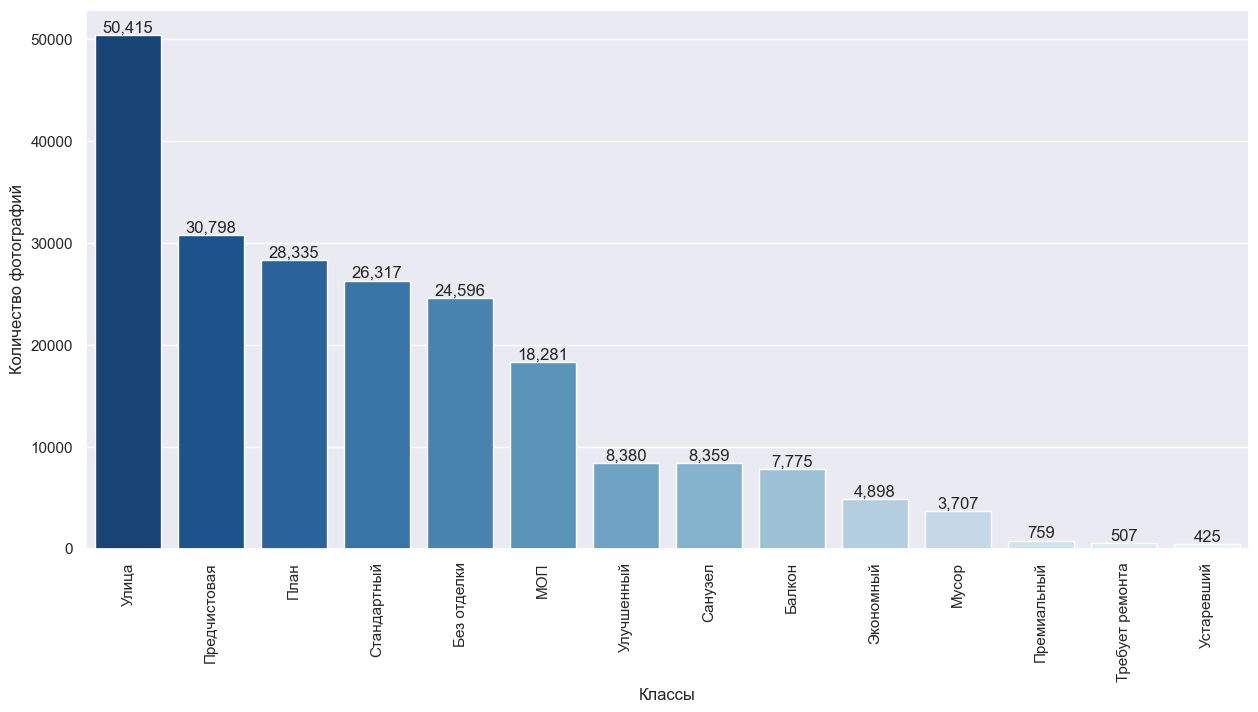

In [11]:
classes = [
           'Без отделки', 
           'Предчистовая', 
           'Требует ремонта', 
           'Устаревший', 
           'Экономный', 
           'Стандартный', 
           'Улучшенный', 
           'Премиальный', 
           'Санузел', 
           'План', 
           'Улица',
           'Балкон',
           'МОП',
           'Мусор'
          ]

counts = [24596, 30798, 507, 425, 4898, 26317, 8380, 759, 8359, 28335, 50415, 7775, 18281, 3707]

df_gr = pd.DataFrame(classes, columns = ['classes'])
df_gr['counts'] = counts
df_gr = df_gr.sort_values(by = 'counts', ascending = False)

plt.figure(figsize = (15, 7))

sns.barplot(
            data = df_gr,
            x = 'classes', 
            y = 'counts',
            palette = 'Blues_r'
            #orient = 'h'
          )

for x, y, count in zip(range(14), df_gr['counts'], df_gr['counts']):
    plt.text(x, y, f'{count:,.0f}', ha = 'center', va = 'bottom')

plt.xticks(rotation = 90)
plt.ylabel('Количество фотографий')
plt.xlabel('Классы')

plt.show();

C:\Users\skapr\AppData\Local\Temp\ipykernel_9080\791199535.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


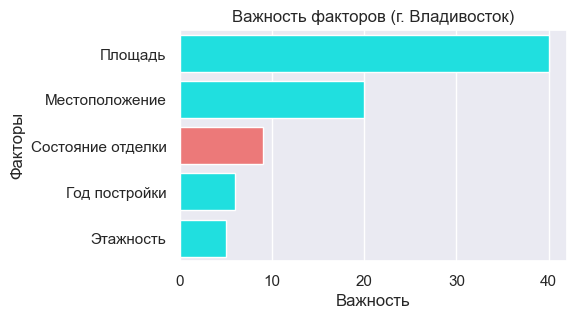

In [37]:
factors = [
           'Площадь', 
           'Местоположение', 
           'Состояние отделки', 
           'Год постройки',
           'Этажность'
          ]

counts = [40, 20, 9, 6, 5]

color = ['#00FFFF', '#00FFFF', '#FF6666', '#00FFFF', '#00FFFF']

df_gr = pd.DataFrame(factors, columns = ['factors'])
df_gr['counts'] = counts
df_gr = df_gr.sort_values(by = 'counts', ascending = False)

plt.figure(figsize = (5, 3))

sns.barplot(
            data = df_gr,
            x = 'counts', 
            y = 'factors',
            palette = color, #Blues_r
            #color = color,
            orient = 'h'
          )

plt.title('Важность факторов (г. Владивосток)')
plt.ylabel('Факторы')
plt.xlabel('Важность')

plt.show();

C:\Users\skapr\AppData\Local\Temp\ipykernel_9080\3097962936.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


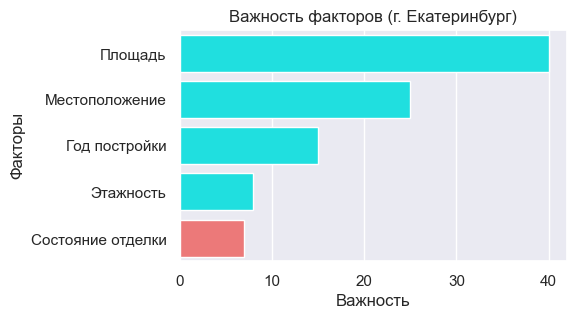

In [38]:
factors = [
           'Площадь', 
           'Местоположение', 
           'Год постройки', 
           'Этажность',
           'Состояние отделки'
          ]

counts = [40, 25, 15, 8, 7]

color = ['#00FFFF', '#00FFFF', '#00FFFF', '#00FFFF', '#FF6666']

df_gr = pd.DataFrame(factors, columns = ['factors'])
df_gr['counts'] = counts
df_gr = df_gr.sort_values(by = 'counts', ascending = False)

plt.figure(figsize = (5, 3))

sns.barplot(
            data = df_gr,
            x = 'counts', 
            y = 'factors',
            palette = color, #Blues_r
            #color = 'cyan',
            orient = 'h'
          )

plt.title('Важность факторов (г. Екатеринбург)')
plt.ylabel('Факторы')
plt.xlabel('Важность')

plt.show();

C:\Users\skapr\AppData\Local\Temp\ipykernel_9080\3693118556.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


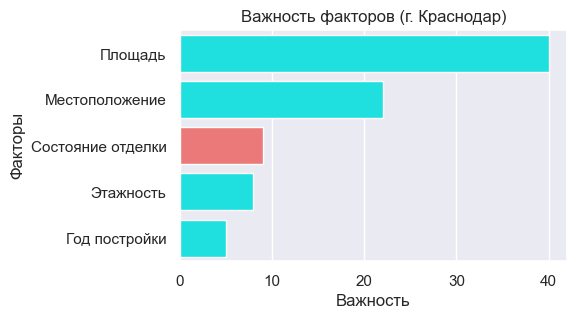

In [39]:
factors = [
           'Площадь', 
           'Местоположение', 
           'Состояние отделки', 
           'Этажность',
           'Год постройки'
          ]

counts = [40, 22, 9, 8, 5]

color = ['#00FFFF', '#00FFFF', '#FF6666', '#00FFFF', '#00FFFF']

df_gr = pd.DataFrame(factors, columns = ['factors'])
df_gr['counts'] = counts
df_gr = df_gr.sort_values(by = 'counts', ascending = False)

plt.figure(figsize = (5, 3))

sns.barplot(
            data = df_gr,
            x = 'counts', 
            y = 'factors',
            palette = color, #Blues_r
            #color = 'cyan',
            orient = 'h'
          )

plt.title('Важность факторов (г. Краснодар)')
plt.ylabel('Факторы')
plt.xlabel('Важность')

plt.show();

C:\Users\skapr\AppData\Local\Temp\ipykernel_9080\2486454557.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


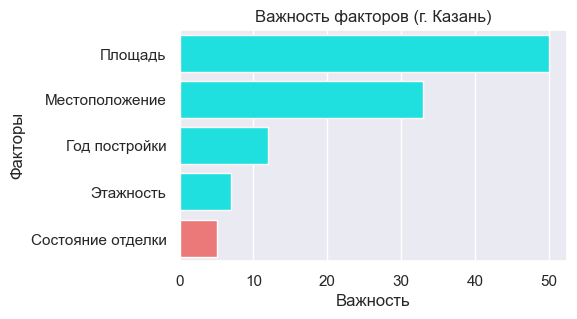

In [40]:
factors = [
           'Площадь', 
           'Местоположение', 
           'Год постройки',
           'Этажность',
           'Состояние отделки'
          ]

counts = [50, 33, 12, 7, 5]

color = ['#00FFFF', '#00FFFF', '#00FFFF', '#00FFFF', '#FF6666']

df_gr = pd.DataFrame(factors, columns = ['factors'])
df_gr['counts'] = counts
df_gr = df_gr.sort_values(by = 'counts', ascending = False)

plt.figure(figsize = (5, 3))

sns.barplot(
            data = df_gr,
            x = 'counts', 
            y = 'factors',
            palette = color, #Blues_r
            #color = 'cyan',
            orient = 'h'
          )

plt.title('Важность факторов (г. Казань)')
plt.ylabel('Факторы')
plt.xlabel('Важность')

plt.show();